# pyramide des ages

In [27]:
#importation des donn√©es
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
data_pop=pd.read_excel("data/wdi_tchad.xlsx",sheet_name="population") 
data_pop.head(2)

Country Name Country                                        Series Name  \
0         Chad     TCD  Population ages 00-04, female (% of female pop...   
1         Chad     TCD  Population ages 00-04, male (% of male populat...   

            Variable       1960       1961       1962       1963       1964  \
0  SP.POP.0004.FE.5Y  16.642978  16.646392  16.652286  16.662936  16.682043   
1  SP.POP.0004.MA.5Y    17.1908  17.195989  17.205861  17.220473  17.243242   

        1965  ...       2014       2015       2016       2017       2018  \
0  16.712086  ...  19.584453  19.507215  19.390039  19.207592  19.008157   
1  17.279567  ...  20.095005  19.997098  19.861089  19.660679  19.445603   

        2019       2020       2021       2022       2023  
0  18.840217  18.683448  18.512699  18.389601  18.156899  
1  19.264497  19.098827  18.922807  18.797746  18.561118  

[2 rows x 68 columns]

In [7]:
#transformation des donn√©es en mode table
 
def tab_large_en_long(data,debut_year,fin_year):
    base_panel=pd.melt(data, id_vars=['Country','Variable'], value_vars=[i for i in range(debut_year,fin_year+1,1)], var_name='Year',value_name='valeur')
    base_panel['Year']=base_panel['Year'].astype(int)

    # Convertir valeur en num√©rique et remplacer les erreurs par NaN
    base_panel['valeur'] = pd.to_numeric(base_panel['valeur'], errors='coerce')

    base_panel=base_panel.pivot_table(index=['Country','Year'],columns='Variable', values='valeur').reset_index()
    return base_panel

In [11]:
data_pop_pivot=tab_large_en_long(data_pop,1960,2023)
data_pop_pivot.head(2)

Variable Country  Year  AG.LND.PRCP.MM  SP.POP.0004.FE.5Y  SP.POP.0004.MA.5Y  \
0            TCD  1960             NaN          16.642978          17.190800   
1            TCD  1961           322.0          16.646392          17.195989   

Variable  SP.POP.0014.FE.ZS  SP.POP.0014.MA.ZS  SP.POP.0509.FE.5Y  \
0                 40.337885          41.668626          13.172390   
1                 40.605336          41.877496          13.184173   

Variable  SP.POP.0509.MA.5Y  SP.POP.1014.FE.5Y  ...  SP.POP.7579.MA.5Y  \
0                 13.503374          10.522517  ...            0.61933   
1                 13.506942          10.774771  ...            0.61322   

Variable  SP.POP.80UP.FE.5Y  SP.POP.80UP.MA.5Y  SP.POP.BRTH.MF  SP.POP.GROW  \
0                  0.450675           0.319560           1.041          NaN   
1                  0.454364           0.323674           1.041      2.01601   

Variable  SP.POP.TOTL  SP.POP.TOTL.FE.IN  SP.POP.TOTL.FE.ZS  \
0           3049838.0          1544018.0          50.626214   
1           3111947.0          1575059.0          50.613298   

Variable  SP.POP.TOTL.MA.IN  SP.POP.TOTL.MA.ZS  
0                 1505820.0          49.373786  
1                 1536888.0          49.386702  

[2 rows x 46 columns]

In [517]:
data_pop_pivot.to_excel("population_tchad_pyramide.xlsx")

In [12]:
data_pop_pivot.columns

Index(['Country', 'Year', 'AG.LND.PRCP.MM', 'SP.POP.0004.FE.5Y',
       'SP.POP.0004.MA.5Y', 'SP.POP.0014.FE.ZS', 'SP.POP.0014.MA.ZS',
       'SP.POP.0509.FE.5Y', 'SP.POP.0509.MA.5Y', 'SP.POP.1014.FE.5Y',
       'SP.POP.1014.MA.5Y', 'SP.POP.1519.FE.5Y', 'SP.POP.1519.MA.5Y',
       'SP.POP.2024.FE.5Y', 'SP.POP.2024.MA.5Y', 'SP.POP.2529.FE.5Y',
       'SP.POP.2529.MA.5Y', 'SP.POP.3034.FE.5Y', 'SP.POP.3034.MA.5Y',
       'SP.POP.3539.FE.5Y', 'SP.POP.3539.MA.5Y', 'SP.POP.4044.FE.5Y',
       'SP.POP.4044.MA.5Y', 'SP.POP.4549.FE.5Y', 'SP.POP.4549.MA.5Y',
       'SP.POP.5054.FE.5Y', 'SP.POP.5054.MA.5Y', 'SP.POP.5559.FE.5Y',
       'SP.POP.5559.MA.5Y', 'SP.POP.6064.FE.5Y', 'SP.POP.6064.MA.5Y',
       'SP.POP.6569.FE.5Y', 'SP.POP.6569.MA.5Y', 'SP.POP.7074.FE.5Y',
       'SP.POP.7074.MA.5Y', 'SP.POP.7579.FE.5Y', 'SP.POP.7579.MA.5Y',
       'SP.POP.80UP.FE.5Y', 'SP.POP.80UP.MA.5Y', 'SP.POP.BRTH.MF',
       'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS',
       'SP.POP.TOTL

In [513]:
def pyramide(data_pop_pivot, year):
    # √âtape 1 : D√©finir les s√©ries et filtrer les donn√©es
    series = {
        "SP.POP.0004.MA.5Y": "Hommes 0-4",
        "SP.POP.0004.FE.5Y": "Femmes 0-4",
        "SP.POP.0509.MA.5Y": "Hommes 5-9",
        "SP.POP.0509.FE.5Y": "Femmes 5-9",
        "SP.POP.1014.MA.5Y": "Hommes 10-14",
        "SP.POP.1014.FE.5Y": "Femmes 10-14",
        "SP.POP.1519.MA.5Y": "Hommes 15-19",
        "SP.POP.1519.FE.5Y": "Femmes 15-19",
        "SP.POP.2024.MA.5Y": "Hommes 20-24",
        "SP.POP.2024.FE.5Y": "Femmes 20-24",
        "SP.POP.2529.MA.5Y": "Hommes 25-29",
        "SP.POP.2529.FE.5Y": "Femmes 25-29",
        "SP.POP.3034.MA.5Y": "Hommes 30-34",
        "SP.POP.3034.FE.5Y": "Femmes 30-34",
        "SP.POP.3539.MA.5Y": "Hommes 35-39",
        "SP.POP.3539.FE.5Y": "Femmes 35-39",
        "SP.POP.4044.MA.5Y": "Hommes 40-44",
        "SP.POP.4044.FE.5Y": "Femmes 40-44",
        "SP.POP.4549.MA.5Y": "Hommes 45-49",
        "SP.POP.4549.FE.5Y": "Femmes 45-49",
        "SP.POP.5054.MA.5Y": "Hommes 50-54",
        "SP.POP.5054.FE.5Y": "Femmes 50-54",
        "SP.POP.5559.MA.5Y": "Hommes 55-59",
        "SP.POP.5559.FE.5Y": "Femmes 55-59",
        "SP.POP.6064.MA.5Y": "Hommes 60-64",
        "SP.POP.6064.FE.5Y": "Femmes 60-64",
        "SP.POP.6569.MA.5Y": "Hommes 65-69",
        "SP.POP.6569.FE.5Y": "Femmes 65-69",
        "SP.POP.7074.MA.5Y": "Hommes 70-74",
        "SP.POP.7074.FE.5Y": "Femmes 70-74",
        "SP.POP.7579.MA.5Y": "Hommes 75-79",
        "SP.POP.7579.FE.5Y": "Femmes 75-79",
        "SP.POP.80UP.MA.5Y": "Hommes 80+",
        "SP.POP.80UP.FE.5Y": "Femmes 80+",
    }

    # Filtrer les donn√©es pour l'ann√©e s√©lectionn√©e
    df_year = data_pop_pivot[data_pop_pivot['Year'] == year]
    df_filtered = df_year[list(series.keys())].rename(columns=series)

    # √âtape 2 : Cr√©er des listes pour les hommes et les femmes
    pop_male = -df_filtered[[col for col in df_filtered.columns if "Hommes" in col]].sum()
    pop_female = df_filtered[[col for col in df_filtered.columns if "Femmes" in col]].sum()

    # Extraire les tranches d'√¢ge
    age_labels = [col.split(" ")[1] for col in pop_male.index]

    # √âtape 3 : Tracer la pyramide des √¢ges
    fig, ax = plt.subplots(figsize=(10, 8))

    # Barres pour hommes et femmes
    ax.barh(age_labels, pop_male, color="blue", label="Hommes")
    ax.barh(age_labels, pop_female, color="pink", label="Femmes")

    # Ajouter les d√©tails au graphique
    ax.set_xlabel("Population (en milliers)")
    ax.set_ylabel("Tranche d'√¢ge")
    ax.set_title(f"Pyramide des √¢ges - Tchad en {year}")
    ax.legend()

    # Rendre les valeurs des abscisses positives
    xticks = ax.get_xticks()
    ax.set_xticklabels([abs(int(tick)) for tick in xticks])

    ax.grid(axis="x", linestyle="--", alpha=0.7)

    # Ajuster l'apparence
    plt.tight_layout()
    plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_28600\1772401033.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([abs(int(tick)) for tick in xticks])


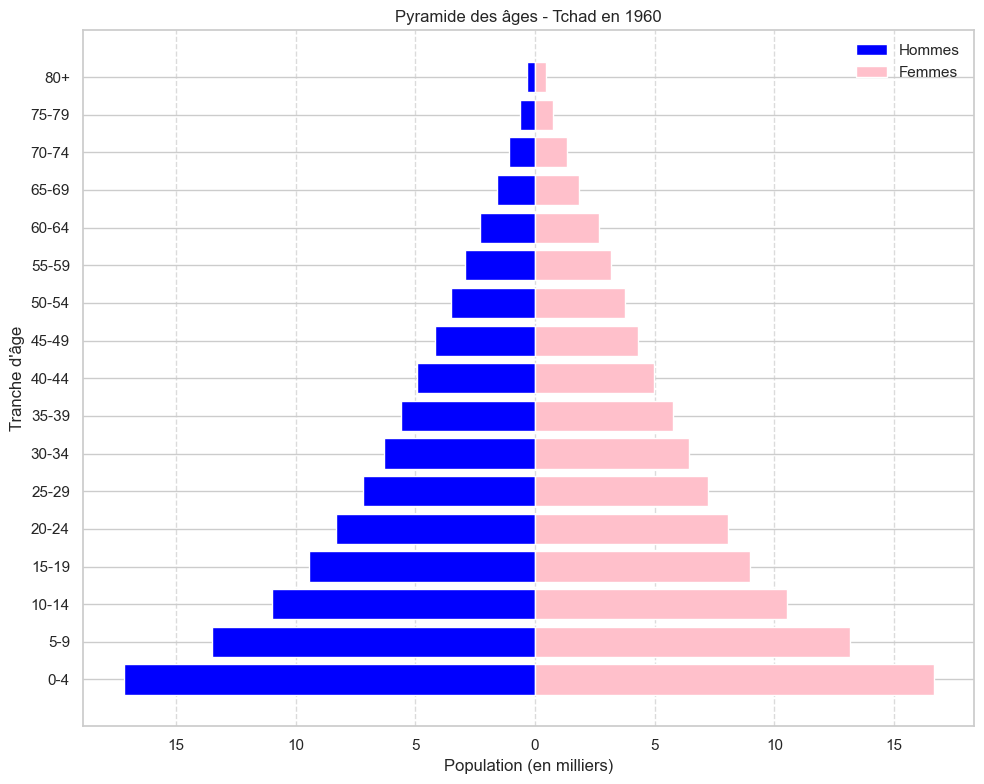

In [516]:
pyramide(data_pop_pivot,1960)

# MES

In [326]:
path="data/data_finale/base_finale_mes.xlsx"
data=pd.read_excel(path,sheet_name="data_mes") 
data.head(2)

Country        Variable   1960   1961   1962   1963   1964   1965   1966  \
0      td  indice_prod_ag     ..  22.58  25.03  27.83  26.47  25.20  25.51   
1      td   tasmax_annuel  33.51  31.99  32.81  33.18  32.88  33.51  33.62   

    1967  ...    2014   2015    2016   2017    2018    2019    2020    2021  \
0  24.74  ...  100.74  92.45  106.81  98.37  103.38  109.83  105.90  101.49   
1  32.50  ...   34.44  34.22   34.51  34.30   34.63   34.39   34.19   34.60   

     2022   2023  
0  104.38     ..  
1   33.93  35.01  

[2 rows x 66 columns]

In [327]:
import pandas as pd 
def tab_large_en_long(data,debut_year,fin_year):
    base_panel=pd.melt(data, id_vars=['Country','Variable'], value_vars=[i for i in range(debut_year,fin_year+1,1)], var_name='Year',value_name='valeur')
    base_panel['Year']=base_panel['Year'].astype(int)

    # Convertir valeur en num√©rique et remplacer les erreurs par NaN
    base_panel['valeur'] = pd.to_numeric(base_panel['valeur'], errors='coerce')

    base_panel=base_panel.pivot_table(index=['Country','Year'],columns='Variable', values='valeur').reset_index()
    return base_panel

In [328]:
base=tab_large_en_long(data,1960,2023)

In [329]:
#base.to_excel("nbc.xlsx")
base.head(2)

Variable Country  Year  aqua_culti_land  aqua_pluvio  gaz_effet_serre  \
0             td  1960              NaN          NaN              NaN   
1             td  1961              NaN          NaN              NaN   

Variable  indice_prod_ag  tasmax_annuel  tasmin_annuel  
0                    NaN          33.51          19.84  
1                  22.58          31.99          18.72

## base additif

In [330]:
data_ag=pd.read_excel(path,sheet_name="emploi_ag") 
data_ag.head(2)
base = pd.merge(base, data_ag, on='Year', how='left')
base.head(2)

Country  Year  aqua_culti_land  aqua_pluvio  gaz_effet_serre  \
0      td  1960              NaN          NaN              NaN   
1      td  1961              NaN          NaN              NaN   

   indice_prod_ag  tasmax_annuel  tasmin_annuel  emploi_ag  
0             NaN          33.51          19.84        NaN  
1           22.58          31.99          18.72        NaN

In [331]:
#Macrotrends Data Download
data_coton=pd.read_csv("data/data_finale/data_cotton.csv")
data_coton.head(2)

date   value
0  1972-08-22  0.2673
1  1972-08-23  0.2703

In [332]:
def convert_var(data,anc_var,nouv_var,var_kg):
    # Convertir la colonne 'date' en format datetime
    data['date'] = pd.to_datetime(data['date'])

    # Extraire l'ann√©e et cr√©er la colonne 'Year'
    data['Year'] = data['date'].dt.year
    data.columns = data.columns.str.strip()# Supprime les espaces autour des noms de colonnes

    # Calculer la moyenne annuelle de 'value' en groupant par 'Year'
    moyenne_annuelle = data.groupby('Year')[anc_var].transform('mean')

    # Ajouter la colonne 'moyenne' √† la base
    data['moyenne'] = moyenne_annuelle
    # Calculer la moyenne par ann√©e
    data_cot = data.groupby('Year')['value'].mean().reset_index()

    # Renommer la colonne moyenne
    data_cot = data_cot.rename(columns={'value': nouv_var})

    # Ajouter une colonne Prix_cotton qui contient la conversion en USD/kg
    data_cot[var_kg] = data_cot[nouv_var] / 0.453592
    return data_cot

In [333]:
data_cot=convert_var(data_coton,'value','Prix_cotton(USD/livre)','Prix_cotton (USD/kg)')
data_cot.head(2)

Year  Prix_cotton(USD/livre)  Prix_cotton (USD/kg)
0  1972                0.297552              0.655991
1  1973                0.598669              1.319840

In [334]:
# Cr√©er une s√©rie compl√®te d'ann√©es de 1960 √† 2023
all_years = pd.DataFrame({'Year': range(1960, 2024)})
# Fusionner avec le DataFrame existant pour inclure toutes les ann√©es
data_cot = pd.merge(all_years, data_cot, on='Year', how='left')

# Afficher le r√©sultat
data_cot.head(2)

Year  Prix_cotton(USD/livre)  Prix_cotton (USD/kg)
0  1960                     NaN                   NaN
1  1961                     NaN                   NaN

In [335]:
base["Prix_cotton (USD/kg)"]= data_cot["Prix_cotton (USD/kg)"]
base

Country  Year  aqua_culti_land  aqua_pluvio  gaz_effet_serre  \
0       td  1960              NaN          NaN              NaN   
1       td  1961              NaN          NaN              NaN   
2       td  1962              NaN          NaN              NaN   
3       td  1963              NaN          NaN              NaN   
4       td  1964              NaN          NaN              NaN   
..     ...   ...              ...          ...              ...   
59      td  2019         4.157321        648.2         4.687813   
60      td  2020         4.157321        648.2         4.765552   
61      td  2021         4.157321        648.2         4.824752   
62      td  2022              NaN          NaN         4.867828   
63      td  2023              NaN          NaN              NaN   

    indice_prod_ag  tasmax_annuel  tasmin_annuel  emploi_ag  \
0              NaN          33.51          19.84        NaN   
1            22.58          31.99          18.72        NaN   
2            25.03          32.81          19.49        NaN   
3            27.83          33.18          19.87        NaN   
4            26.47          32.88          19.12        NaN   
..             ...            ...            ...        ...   
59          109.83          34.39          21.44  69.842184   
60          105.90          34.19          21.32  69.766071   
61          101.49          34.60          21.44  69.549439   
62          104.38          33.93          20.99  69.153914   
63             NaN          35.01          22.15        NaN   

    Prix_cotton (USD/kg)  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
..                   ...  
59              1.485232  
60              1.417045  
61              2.060450  
62              2.487663  
63              1.829324  

[64 rows x 10 columns]

In [336]:
#Macrotrends Data Download
data_corn=pd.read_csv("data/data_finale/data_corn.csv")
data_corn.head(2)

date  value
0  1959-07-01  1.177
1  1959-07-02  1.176

In [337]:
data_cor=convert_var(data_corn,'value','Prix_corn(USD/livre)','Prix_corn (USD/kg)')
data_cor.head(2)

Year  Prix_corn(USD/livre)  Prix_corn (USD/kg)
0  1959              1.151117            2.537781
1  1960              1.139188            2.511482

In [338]:
# Fusionner les bases sur la colonne "Year"
base = pd.merge(base, data_cor[['Year', 'Prix_corn (USD/kg)']], on='Year', how='left')
base

Country  Year  aqua_culti_land  aqua_pluvio  gaz_effet_serre  \
0       td  1960              NaN          NaN              NaN   
1       td  1961              NaN          NaN              NaN   
2       td  1962              NaN          NaN              NaN   
3       td  1963              NaN          NaN              NaN   
4       td  1964              NaN          NaN              NaN   
..     ...   ...              ...          ...              ...   
59      td  2019         4.157321        648.2         4.687813   
60      td  2020         4.157321        648.2         4.765552   
61      td  2021         4.157321        648.2         4.824752   
62      td  2022              NaN          NaN         4.867828   
63      td  2023              NaN          NaN              NaN   

    indice_prod_ag  tasmax_annuel  tasmin_annuel  emploi_ag  \
0              NaN          33.51          19.84        NaN   
1            22.58          31.99          18.72        NaN   
2            25.03          32.81          19.49        NaN   
3            27.83          33.18          19.87        NaN   
4            26.47          32.88          19.12        NaN   
..             ...            ...            ...        ...   
59          109.83          34.39          21.44  69.842184   
60          105.90          34.19          21.32  69.766071   
61          101.49          34.60          21.44  69.549439   
62          104.38          33.93          20.99  69.153914   
63             NaN          35.01          22.15        NaN   

    Prix_cotton (USD/kg)  Prix_corn (USD/kg)  
0                    NaN            2.511482  
1                    NaN            2.488961  
2                    NaN            2.414563  
3                    NaN            2.629954  
4                    NaN            2.683997  
..                   ...                 ...  
59              1.485232            8.497493  
60              1.417045            8.023330  
61              2.060450           12.674562  
62              2.487663           15.306566  
63              1.829324           12.473542  

[64 rows x 11 columns]

In [339]:
base.columns

Index(['Country', 'Year', 'aqua_culti_land', 'aqua_pluvio', 'gaz_effet_serre',
       'indice_prod_ag', 'tasmax_annuel', 'tasmin_annuel', 'emploi_ag',
       'Prix_cotton (USD/kg)', 'Prix_corn (USD/kg)'],
      dtype='object')

# gestion des valeurs manquantes

In [348]:
base.isnull().sum()

Country                  0
Year                     0
aqua_culti_land          9
aqua_pluvio              9
gaz_effet_serre         11
indice_prod_ag           2
tasmax_annuel            0
tasmin_annuel            0
emploi_ag               32
Prix_cotton (USD/kg)    12
Prix_corn (USD/kg)       0
dtype: int64

In [506]:
#recap des valeurs manquantes
df=base.copy()
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Cr√©ation d'un DataFrame pour r√©sumer les informations
missing_summary = pd.DataFrame({
    'Variable': df.columns,
    'Valeurs Manquantes': missing_values,
    'Pourcentage (%)': missing_percentage
}).reset_index(drop=True)

# Affichage des variables ayant des valeurs manquantes
missing_summary = missing_summary[missing_summary['Valeurs Manquantes'] > 0]
print(missing_summary)

               Variable  Valeurs Manquantes  Pourcentage (%)
2       aqua_culti_land                   9          14.0625
3           aqua_pluvio                   9          14.0625
4       gaz_effet_serre                  11          17.1875
5        indice_prod_ag                   2           3.1250
8             emploi_ag                  32          50.0000
9  Prix_cotton (USD/kg)                  12          18.7500



Traitement de la variable : aqua_pluvio


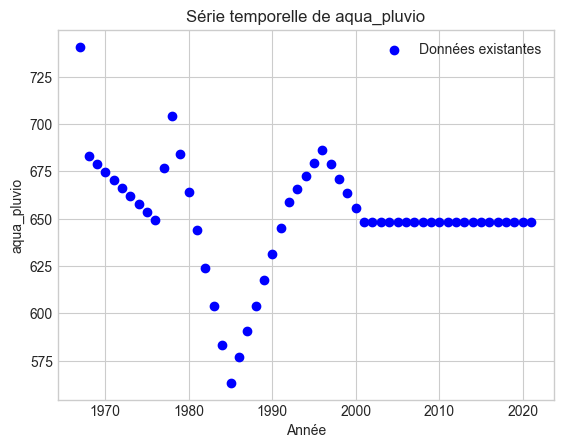


Traitement de la variable : indice_prod_ag


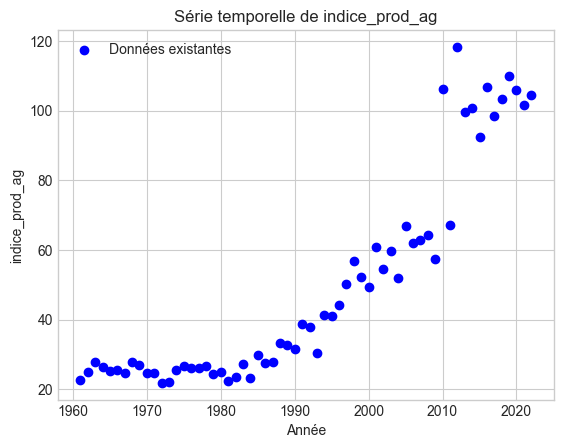


Traitement de la variable : aqua_culti_land


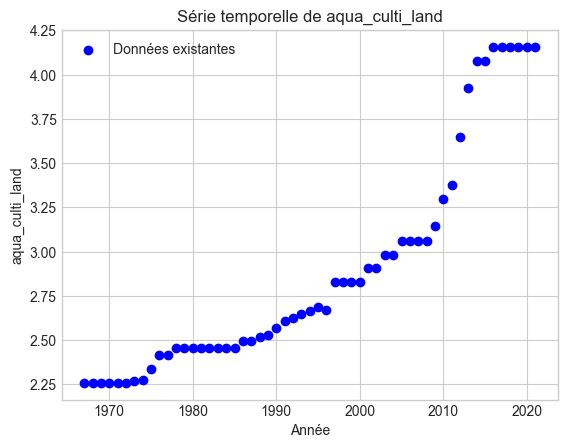


Traitement de la variable : gaz_effet_serre


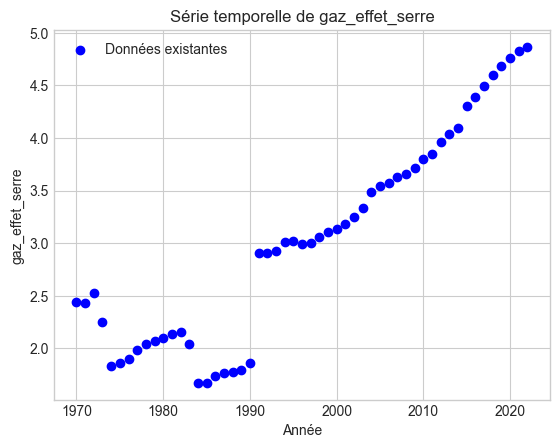


Traitement de la variable : emploi_ag


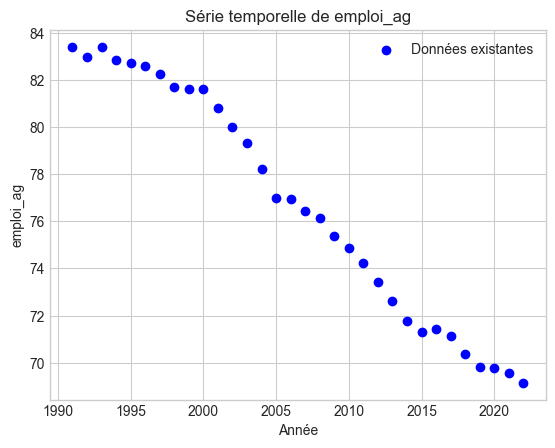


Traitement de la variable : Prix_cotton (USD/kg)


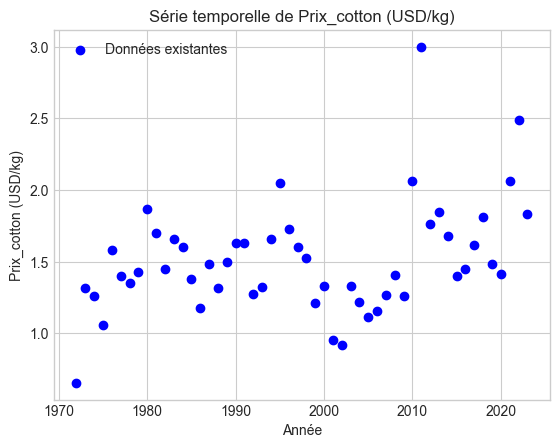

In [385]:
variables = ["Year","aqua_pluvio","indice_prod_ag", "aqua_culti_land","gaz_effet_serre",'emploi_ag','Prix_cotton (USD/kg)']
for var in variables[1:]:
    print(f"\nTraitement de la variable : {var}")
    data=base.copy()
    # Filtrer les valeurs non manquantes
    valid_data = data.dropna(subset=[var])
    X = valid_data["Year"].values.reshape(-1, 1)
    y = valid_data[var].values

    # Repr√©senter graphiquement la s√©rie
    plt.figure()
    plt.scatter(X, y, label="Donn√©es existantes", color="blue")
    plt.title(f"S√©rie temporelle de {var}")
    plt.xlabel("Ann√©e")
    plt.ylabel(var)
    plt.legend()
    plt.show()

In [ ]:
# on regarde si la tendance des s√©ries en terme de regression pour les autres variables sans l'indice de production car imputation par moy g√©om√©trique

In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit



#variables = ["Year", "aqua_culti_land", "gaz_effet_serre", "indice_prod_ag"]
def coeff_corr(base,variables):
    data = base[variables]
    # Fonction pour une r√©gression exponentielle
    def exp_func(x, a, b):
        return a * np.exp(b * x)

    # Stocker les r√©sultats d'imputation
    imputed_data = data.copy()

    # DataFrame pour stocker les corr√©lations
    correlation_data = []
    #correlation_df = pd.DataFrame(columns=["Variable", "Mod√®le", "Corr√©lation"])
    # Parcourir chaque variable sauf "Year"
    for var in variables[1:]:
        print(f"\nTraitement de la variable : {var}")

        # Filtrer les valeurs non manquantes
        valid_data = data.dropna(subset=[var])
        X = valid_data["Year"].values.reshape(-1, 1)
        y = valid_data[var].values

        # Mod√®les de r√©gression
        correlations = {}

        # 1. R√©gression lin√©aire
        linear_model = LinearRegression()
        linear_model.fit(X, y)
        y_pred_linear = linear_model.predict(X)
        corr_linear = np.corrcoef(y, y_pred_linear)[0, 1]
        correlations["lin√©aire"] = corr_linear
        # Ajouter au DataFrame
        #correlation_df = correlation_df.append({"Variable": var, "Mod√®le": "Linaire", "Corr√©lation": corr_linear}, ignore_index=True)
        correlation_data.append({"Variable": var, "Mod√®le": "Lin√©aire", "Corr√©lation": corr_linear})


        # 2. R√©gression exponentielle
        try:
            popt, _ = curve_fit(exp_func, X.flatten(), y)
            y_pred_exp = exp_func(X.flatten(), *popt)
            corr_exp = np.corrcoef(y, y_pred_exp)[0, 1]
            #correlations["exponentielle"] = corr_exp
            correlation_data.append({"Variable": var, "Mod√®le": "Exponentielle", "Corr√©lation": corr_exp})
        except:
            print("R√©gression exponentielle impossible pour cette variable.")

        # 3. R√©gression polynomiale (de degr√© 2)
        poly = PolynomialFeatures(degree=2)
        X_poly = poly.fit_transform(X)
        poly_model = LinearRegression()
        poly_model.fit(X_poly, y)
        y_pred_poly = poly_model.predict(X_poly)
        corr_poly = np.corrcoef(y, y_pred_poly)[0, 1]
        #correlations["polynomiale"] = corr_poly
        #base_correlation[var]=correlations
        # Ajouter au DataFrame
        correlation_data.append({"Variable": var, "Mod√®le": "Polynomiale", "Corr√©lation": corr_poly})
    # Convertir les corr√©lations en DataFrame
    correlation_df = pd.DataFrame(correlation_data)
    return correlation_df


In [401]:
variables = ["Year", "aqua_culti_land", "aqua_pluvio","indice_prod_ag", "gaz_effet_serre",'emploi_ag','Prix_cotton (USD/kg)']
correlation_df=coeff_corr(base,variables)
correlation_df


Traitement de la variable : aqua_culti_land
R√©gression exponentielle impossible pour cette variable.

Traitement de la variable : aqua_pluvio
R√©gression exponentielle impossible pour cette variable.

Traitement de la variable : indice_prod_ag
R√©gression exponentielle impossible pour cette variable.

Traitement de la variable : gaz_effet_serre
R√©gression exponentielle impossible pour cette variable.

Traitement de la variable : emploi_ag
R√©gression exponentielle impossible pour cette variable.

Traitement de la variable : Prix_cotton (USD/kg)
R√©gression exponentielle impossible pour cette variable.


C:\Users\Hp\AppData\Local\Temp\ipykernel_28600\2569195936.py:15: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
C:\Users\Hp\AppData\Local\Temp\ipykernel_28600\2569195936.py:15: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
C:\Users\Hp\AppData\Local\Temp\ipykernel_28600\2569195936.py:15: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
C:\Users\Hp\AppData\Local\Temp\ipykernel_28600\2569195936.py:15: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
C:\Users\Hp\AppData\Local\Temp\ipykernel_28600\2569195936.py:15: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
C:\Users\Hp\AppData\Local\Temp\ipykernel_28600\2569195936.py:15: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)


Variable       Mod√®le  Corr√©lation
0        aqua_culti_land     Lin√©aire     0.918066
1        aqua_culti_land  Polynomiale     0.979278
2            aqua_pluvio     Lin√©aire     0.169757
3            aqua_pluvio  Polynomiale     0.378930
4         indice_prod_ag     Lin√©aire     0.890987
5         indice_prod_ag  Polynomiale     0.963693
6        gaz_effet_serre     Lin√©aire     0.922069
7        gaz_effet_serre  Polynomiale     0.958690
8              emploi_ag     Lin√©aire     0.990455
9              emploi_ag  Polynomiale     0.991339
10  Prix_cotton (USD/kg)     Lin√©aire     0.363805
11  Prix_cotton (USD/kg)  Polynomiale     0.383141

In [ ]:
#imputer les variables √† coeff de corr√©lation plus √©l√©v√©s par une regression polynomiale

In [396]:
def impute_missing_values(data, correlation_df):
    imputed_data = data.copy()

    for var in correlation_df["Variable"].unique():
        # Trouver le mod√®le avec la plus grande corr√©lation
        best_model_row = correlation_df[correlation_df["Variable"] == var].sort_values("Corr√©lation", ascending=False).iloc[0]
        best_model = best_model_row["Mod√®le"]
        
        # Filtrer les donn√©es valides pour la variable
        valid_data = data.dropna(subset=[var])
        X_valid = valid_data["Year"].values.reshape(-1, 1)
        y_valid = valid_data[var].values

        # Pr√©parer les ann√©es manquantes
        missing_years = data[data[var].isna()]["Year"].values.reshape(-1, 1)

        if best_model == "Lin√©aire":
            # R√©entra√Æner le mod√®le lin√©aire
            linear_model = LinearRegression()
            linear_model.fit(X_valid, y_valid)
            imputed_values = linear_model.predict(missing_years)

        #elif best_model == "Exponentielle":
         #   # Ajuster le mod√®le exponentiel
         #   popt, _ = curve_fit(exp_func, X_valid.flatten(), y_valid)
         #   imputed_values = exp_func(missing_years.flatten(), *popt)

        elif best_model == "Polynomiale":
            # Ajuster le mod√®le polynomial
            poly = PolynomialFeatures(degree=2)
            X_valid_poly = poly.fit_transform(X_valid)
            poly_model = LinearRegression()
            poly_model.fit(X_valid_poly, y_valid)
            missing_years_poly = poly.fit_transform(missing_years)
            imputed_values = poly_model.predict(missing_years_poly)

        # Remplacer les valeurs manquantes
        imputed_data.loc[data[var].isna(), var] = imputed_values

    return imputed_data

In [402]:
variables = ["Year", "aqua_culti_land","gaz_effet_serre","indice_prod_ag",'emploi_ag']
correlation_df=coeff_corr(base,variables)
correlation_df


Traitement de la variable : aqua_culti_land
R√©gression exponentielle impossible pour cette variable.

Traitement de la variable : gaz_effet_serre
R√©gression exponentielle impossible pour cette variable.

Traitement de la variable : indice_prod_ag
R√©gression exponentielle impossible pour cette variable.

Traitement de la variable : emploi_ag
R√©gression exponentielle impossible pour cette variable.


C:\Users\Hp\AppData\Local\Temp\ipykernel_28600\2569195936.py:15: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
C:\Users\Hp\AppData\Local\Temp\ipykernel_28600\2569195936.py:15: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
C:\Users\Hp\AppData\Local\Temp\ipykernel_28600\2569195936.py:15: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
C:\Users\Hp\AppData\Local\Temp\ipykernel_28600\2569195936.py:15: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)


Variable       Mod√®le  Corr√©lation
0  aqua_culti_land     Lin√©aire     0.918066
1  aqua_culti_land  Polynomiale     0.979278
2  gaz_effet_serre     Lin√©aire     0.922069
3  gaz_effet_serre  Polynomiale     0.958690
4   indice_prod_ag     Lin√©aire     0.890987
5   indice_prod_ag  Polynomiale     0.963693
6        emploi_ag     Lin√©aire     0.990455
7        emploi_ag  Polynomiale     0.991339

In [403]:
base_imp_reg=impute_missing_values(base, correlation_df)

In [404]:
base_imp_reg.head(5)

Country  Year  aqua_culti_land  aqua_pluvio  gaz_effet_serre  \
0      td  1960         2.523169          NaN         2.203625   
1      td  1961         2.496156          NaN         2.175531   
2      td  1962         2.471021          NaN         2.149885   
3      td  1963         2.447764          NaN         2.126686   
4      td  1964         2.426385          NaN         2.105936   

   indice_prod_ag  tasmax_annuel  tasmin_annuel  emploi_ag  \
0       28.669902          33.51          19.84  95.603350   
1       22.580000          31.99          18.72  95.324853   
2       25.030000          32.81          19.49  95.040958   
3       27.830000          33.18          19.87  94.751664   
4       26.470000          32.88          19.12  94.456971   

   Prix_cotton (USD/kg)  Prix_corn (USD/kg)  
0                   NaN            2.511482  
1                   NaN            2.488961  
2                   NaN            2.414563  
3                   NaN            2.629954  
4                   NaN            2.683997

In [399]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def plot_polynomial_regression(X, y, degree):
    """
    Repr√©sente une s√©rie et la courbe de r√©gression polynomiale associ√©e.
    
    Args:
    - X: array-like, les donn√©es ind√©pendantes (ex: ann√©es).
    - y: array-like, les donn√©es d√©pendantes (valeurs de la s√©rie).
    - degree: int, le degr√© du polyn√¥me.
    """
    # Transformer les donn√©es pour un mod√®le polynomial
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    
    # Ajuster le mod√®le
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    
    # Pr√©dictions
    X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)  # Plus de points pour une courbe lisse
    X_plot_poly = poly.fit_transform(X_plot)
    y_pred = poly_model.predict(X_plot_poly)
    
    # Repr√©sentation graphique
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color="blue", label="Donn√©es existantes", alpha=0.7)
    plt.plot(X_plot, y_pred, color="red", label=f"R√©gression polynomiale (degr√© {degree})", linewidth=2)
    plt.title("R√©gression polynomiale")
    plt.xlabel("X (ex: Ann√©es)")
    plt.ylabel("Y (ex: Valeurs)")
    plt.legend()
    plt.grid(True)
    plt.show()






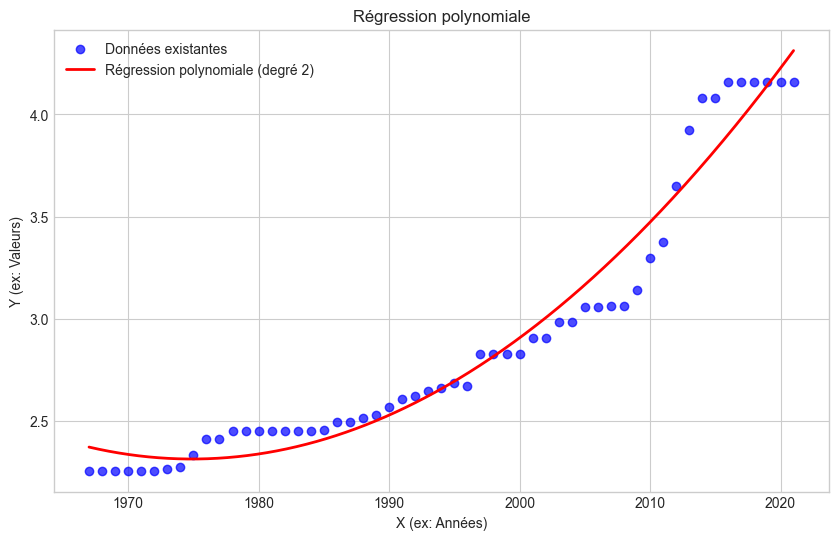

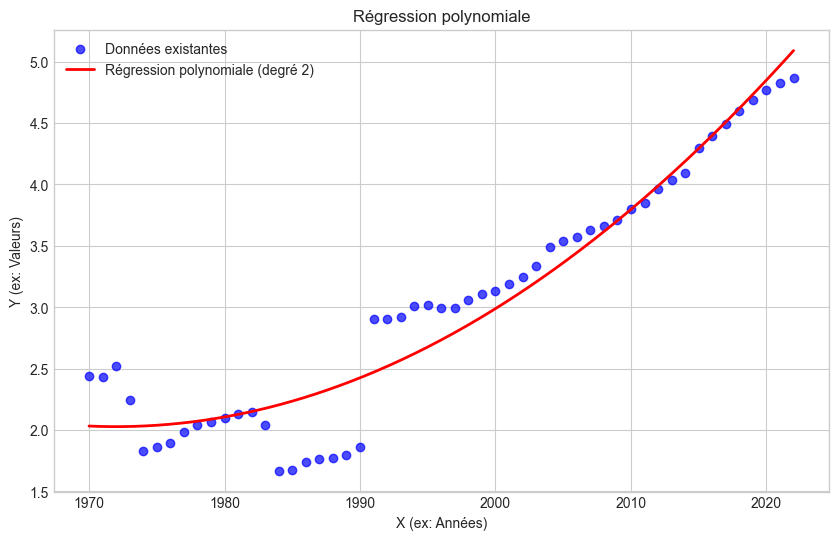

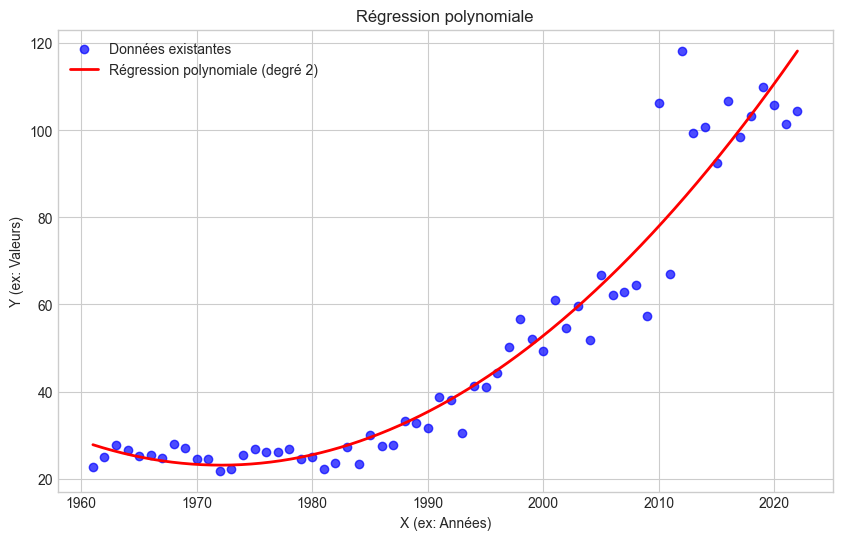

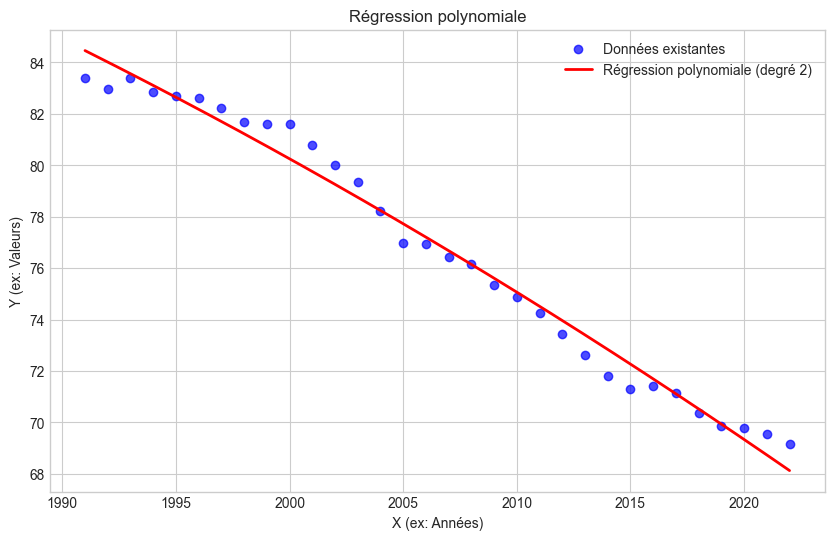

In [400]:
variables = ["aqua_culti_land", "gaz_effet_serre", "indice_prod_ag","emploi_ag"]
for var in variables:
    valid_data = data.dropna(subset=[var])
    X = np.array(list(valid_data["Year"]))
    y = np.array(list(valid_data[var]))

    plot_polynomial_regression(X, y, degree=2)

## imputation par la moyenne g√©om√©trique

In [405]:
import pandas as pd
import numpy as np

# Calcul de la moyenne g√©om√©trique
def geometric_mean(series):
    """
    Calcule la moyenne g√©om√©trique des valeurs d'une s√©rie pandas non nulle.
    """
    non_null_values = series.dropna()
    product = np.prod(non_null_values)
    n = len(non_null_values)
    return product**(1/n)

# Imputation des valeurs manquantes
def impute_with_geometric_mean(base, column_name):
    """
    Impute les valeurs manquantes d'une colonne avec la moyenne g√©om√©trique de ses valeurs non manquantes.
    
    Args:
    - base (pd.DataFrame): La base de donn√©es contenant la colonne √† imputer.
    - column_name (str): Le nom de la colonne √† imputer.
    
    Returns:
    - pd.DataFrame: Une nouvelle base de donn√©es avec les valeurs imput√©es.
    """
    # Calculer la moyenne g√©om√©trique
    geo_mean = geometric_mean(base[column_name])
    print(f"Moyenne g√©om√©trique pour {column_name} : {geo_mean:.2f}")
    
    # Remplir les valeurs manquantes
    base_imputed = base.copy()
    base_imputed[column_name] = base_imputed[column_name].fillna(geo_mean)
    
    return base_imputed

# Exemple d'utilisation
# Charger la base (remplacez par votre chemin ou DataFrame r√©el)
# base = pd.read_csv("path/to/your/data.csv")


# Appliquer l'imputation
base_imputed_geom = impute_with_geometric_mean(base_imp_reg, "aqua_pluvio")



Moyenne g√©om√©trique pour aqua_pluvio : 650.13


## imputation par la m√©diane

In [ ]:
def imput_mediane(data,var):
    # Calculer la m√©diane
    median_value = data[var].median()
    print(f"M√©diane calcul√©e : {median_value}")

    # Imputer les valeurs manquantes avec la m√©diane
    data[var] = data[var].fillna(median_value)
    print("Imputation termin√©e.")
    return data


In [505]:
base_imputed_geom.isna().sum()

Country                 0
Year                    0
aqua_culti_land         0
aqua_pluvio             0
gaz_effet_serre         0
indice_prod_ag          0
tasmax_annuel           0
tasmin_annuel           0
emploi_ag               0
Prix_cotton (USD/kg)    0
Prix_corn (USD/kg)      0
dtype: int64

In [418]:
base_finale_mes=imput_mediane(base_imputed_geom,"Prix_cotton (USD/kg)")

M√©diane calcul√©e : 1.4467067519361465
Imputation termin√©e.


## base finale

In [422]:
base_finale_mes=base_finale_mes.drop(columns="Country")
base_finale_mes.isna().sum()

Year                    0
aqua_culti_land         0
aqua_pluvio             0
gaz_effet_serre         0
indice_prod_ag          0
tasmax_annuel           0
tasmin_annuel           0
emploi_ag               0
Prix_cotton (USD/kg)    0
Prix_corn (USD/kg)      0
dtype: int64

In [143]:
base_finale_mes.to_excel("New_base_finale_mes.xlsx",index=False)
# Supprimer les colonnes sans nom (nom vide ou NaN)
#data1 = base_finale_mes.loc[:, ~data.columns.str.match(r'^\s*$')]

## valeurs ab√©rentes

In [427]:
base_finale_mes.columns
variables=['aqua_culti_land', 'aqua_pluvio', 'gaz_effet_serre','indice_prod_ag', 'tasmax_annuel', 'tasmin_annuel', 'emploi_ag','Prix_cotton (USD/kg)', 'Prix_corn (USD/kg)']

In [452]:
variables=list(base_finale_mes.columns)
variables.remove("Year")
variables

['aqua_culti_land',
 'aqua_pluvio',
 'gaz_effet_serre',
 'indice_prod_ag',
 'tasmax_annuel',
 'tasmin_annuel',
 'emploi_ag',
 'Prix_cotton (USD/kg)',
 'Prix_corn (USD/kg)']

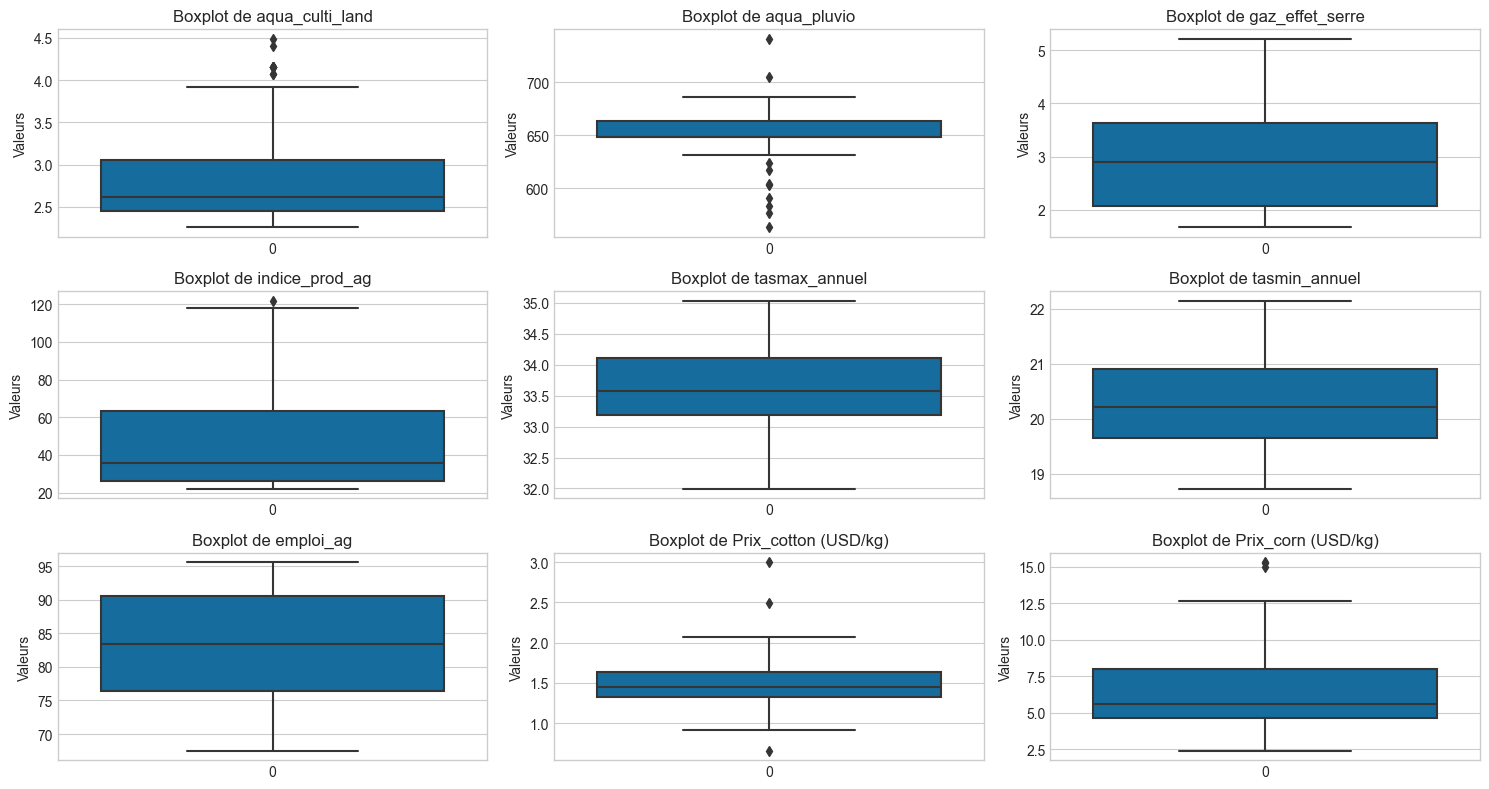

In [429]:

# Cr√©ation de la figure et des axes pour les boxplots (2 lignes et 3 colonnes pour 6 variables)
fig, axes = plt.subplots(3, 3, figsize=(15, 8))

# Aplatir les axes pour it√©rer facilement
axes = axes.flatten()

# Cr√©ation des boxplots pour chaque variable
for i, var in enumerate(variables):
    sns.boxplot(data=base_finale_mes[var], ax=axes[i])
    axes[i].set_title(f"Boxplot de {var}")
    axes[i].set_ylabel("Valeurs")

# Ajuster les espacements entre les subgraphiques
plt.tight_layout()
plt.show()



In [432]:
# Fonction pour d√©tecter les valeurs aberrantes
def detect_outliers(df):
    outliers_percentage = {}
    
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # D√©finition des bornes pour les valeurs aberrantes
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Compter le nombre d'outliers
        outliers_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        
        # Calculer le pourcentage d'outliers
        total_count = len(df[column])
        outliers_percentage[column] = (outliers_count / total_count) * 100
    
    return outliers_percentage

# Calcul des pourcentages de valeurs aberrantes
outliers_percentage = detect_outliers(base_finale_mes[variables])

# Afficher les r√©sultats
for column, percentage in outliers_percentage.items():
    print(f"{column}: {percentage:.2f}% de valeurs aberrantes")

aqua_culti_land: 15.62% de valeurs aberrantes
aqua_pluvio: 15.62% de valeurs aberrantes
gaz_effet_serre: 0.00% de valeurs aberrantes
indice_prod_ag: 1.56% de valeurs aberrantes
tasmax_annuel: 0.00% de valeurs aberrantes
tasmin_annuel: 0.00% de valeurs aberrantes
emploi_ag: 0.00% de valeurs aberrantes
Prix_cotton (USD/kg): 4.69% de valeurs aberrantes
Prix_corn (USD/kg): 4.69% de valeurs aberrantes


In [430]:
# Fonction pour d√©tecter les valeurs aberrantes
def detect_outliers_summary(df):
    summary = {
        "Variable": [],
        "Total valeurs aberrantes": [],
        "Pourcentage valeurs aberrantes": []
    }
    
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # D√©finition des bornes pour les valeurs aberrantes
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Compter le nombre d'outliers
        outliers_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        
        # Calculer le pourcentage d'outliers
        total_count = len(df[column])
        percentage = (outliers_count / total_count) * 100
        
        # Ajouter les r√©sultats au r√©sum√©
        summary["Variable"].append(column)
        summary["Total valeurs aberrantes"].append(outliers_count)
        summary["Pourcentage valeurs aberrantes"].append(round(percentage, 2))
    
    return pd.DataFrame(summary)

# Obtenir le tableau des valeurs aberrantes
outliers_summary = detect_outliers_summary(base_finale_mes[variables])

# Afficher le tableau
print(outliers_summary)


               Variable  Total valeurs aberrantes  \
0       aqua_culti_land                        10   
1           aqua_pluvio                        10   
2       gaz_effet_serre                         0   
3        indice_prod_ag                         1   
4         tasmax_annuel                         0   
5         tasmin_annuel                         0   
6             emploi_ag                         0   
7  Prix_cotton (USD/kg)                         3   
8    Prix_corn (USD/kg)                         3   

   Pourcentage valeurs aberrantes  
0                           15.62  
1                           15.62  
2                            0.00  
3                            1.56  
4                            0.00  
5                            0.00  
6                            0.00  
7                            4.69  
8                            4.69  


In [431]:
def create_outlier_dummies(df, variables):
    """
    Ajoute des colonnes dummy √† la base de donn√©es pour indiquer les valeurs aberrantes.
    
    :param df: DataFrame pandas
    :param variables: Liste des noms des colonnes √† v√©rifier pour les valeurs aberrantes
    :return: DataFrame avec les colonnes dummy ajout√©es
    """
    df = df.copy()  # Cr√©er une copie de la base de donn√©es pour √©viter de modifier l'original

    for column in variables:
        if column in df.columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            
            # D√©finir les bornes pour les valeurs aberrantes
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Cr√©er une colonne dummy pour indiquer les valeurs aberrantes
            dummy_name = f"{column}_outlier"
            df[dummy_name] = ((df[column] < lower_bound) | (df[column] > upper_bound)).astype(int)
        else:
            print(f"Attention : La colonne '{column}' n'existe pas dans la base de donn√©es.")
    
    return df


In [434]:
base_finale_mes_dummy=create_outlier_dummies(base_finale_mes, ["aqua_culti_land","aqua_pluvio"])
#a.to_excel("new_dummy_base_finale_mes.xlsx")

In [439]:
essai=list(base_finale_mes.columns)
len(essai)

10

# Stat desc

## Univari√©e

In [453]:
#importation des biblioth√®ques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [493]:
variables =list(base_finale_mes.columns)
variables.remove("Year")
variables

['aqua_culti_land',
 'aqua_pluvio',
 'gaz_effet_serre',
 'indice_prod_ag',
 'tasmax_annuel',
 'tasmin_annuel',
 'emploi_ag',
 'Prix_cotton (USD/kg)',
 'Prix_corn (USD/kg)']

In [469]:
base_finale_mes.emploi_ag.min()

67.51429980572175

In [475]:
variable_meanings = {
    'aqua_culti_land': "Surface totale des terres agricoles cultiv√©es (%)",
    'aqua_pluvio': "Indice pluviom√©trique annuel",
    'gaz_effet_serre': "√âmissions totales de gaz √† effet de serre (t CO2/personne)",
    'indice_prod_ag': "Indice de production agricole",
    'tasmax_annuel': "Temp√©rature maximale moyenne annuelle (¬∞C)",
    'tasmin_annuel': "Temp√©rature minimale moyenne annuelle (¬∞C)",
    'emploi_ag':"Employ√© agricole(%population employ√©e)",
    'Prix_cotton (USD/kg)':"Prix du coton($ US/kg)",
    'Prix_corn (USD/kg)':"Prix du ma√Øs ($ US/kg)"
}
variable_color={
    'aqua_culti_land': "brown",
    'aqua_pluvio': "purple",
    'gaz_effet_serre': "orange",
    'indice_prod_ag': "b",
    'tasmax_annuel': "r",
    'tasmin_annuel': "g",
    'emploi_ag':"brown",
    'Prix_cotton (USD/kg)':"brown",
    'Prix_corn (USD/kg)':"brown"
}

In [507]:
base_finale_mes[variables].describe()

aqua_culti_land  aqua_pluvio  gaz_effet_serre  tasmax_annuel  \
count        64.000000    64.000000        64.000000      64.000000   
mean          2.894773   650.729122         2.912176      33.601406   
std           0.659295    27.753151         0.999051       0.671097   
min           2.258567   563.300000         1.670140      31.990000   
25%           2.453271   648.200000         2.063190      33.187500   
50%           2.616822   648.900000         2.906774      33.580000   
75%           3.061526   663.649286         3.635796      34.102500   
max           4.488885   740.900000         5.214241      35.040000   

       tasmin_annuel  emploi_ag  Prix_cotton (USD/kg)  Prix_corn (USD/kg)  
count      64.000000  64.000000             64.000000           64.000000  
mean       20.284531  83.316120              1.500449            6.352474  
std         0.781094   8.355479              0.345090            3.187404  
min        18.720000  67.514300              0.655991            2.414563  
25%        19.642500  76.375113              1.326975            4.653559  
50%        20.205000  83.386943              1.446707            5.604040  
75%        20.900000  90.589424              1.629132            7.985054  
max        22.150000  95.603350              2.998584           15.306566

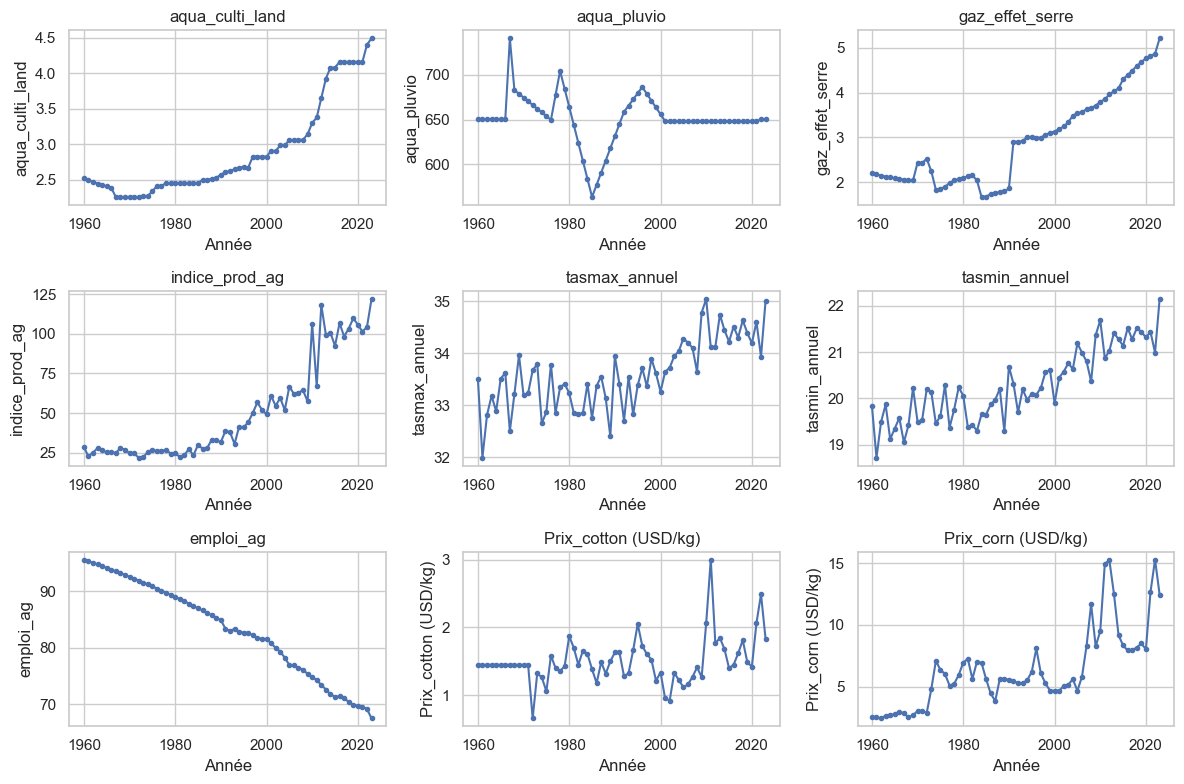

In [471]:
# Cr√©ation des graphiques pour chaque variable
plt.figure(figsize=(12, 8))
for i, variable in enumerate(variables, 1):
    plt.subplot(3, 3, i)  # Organisation en 2 lignes et 3 colonnes
    plt.plot(base_finale_mes['Year'], base_finale_mes[variable], marker='.')
    plt.title(variable)
    plt.xlabel('Ann√©e')
    plt.ylabel(variable)
    plt.grid(True)

# Ajuster les espaces entre les graphiques
plt.tight_layout()
plt.show()

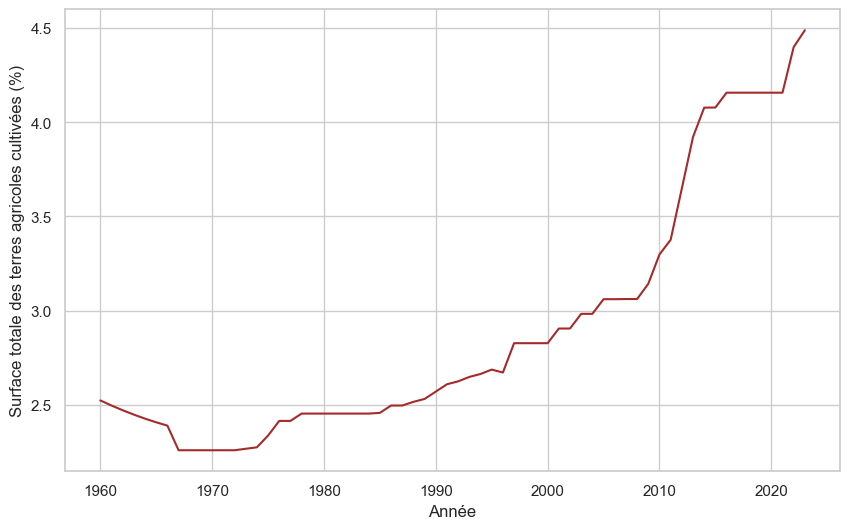

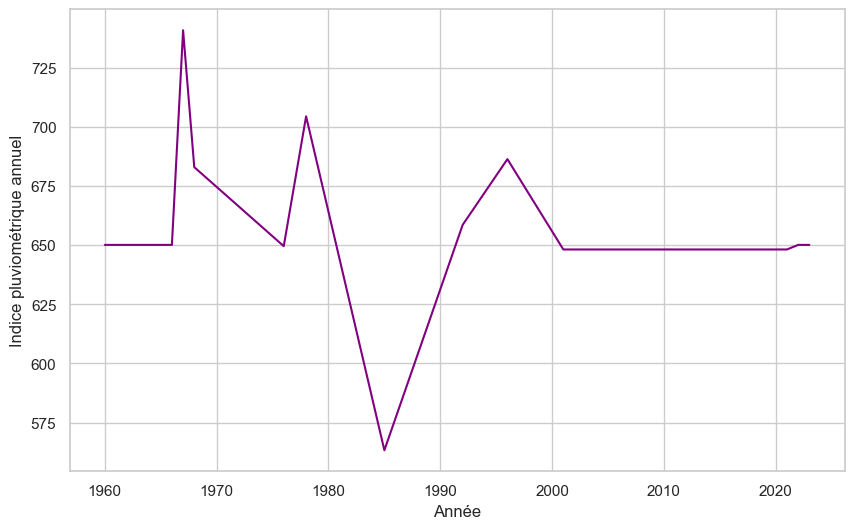

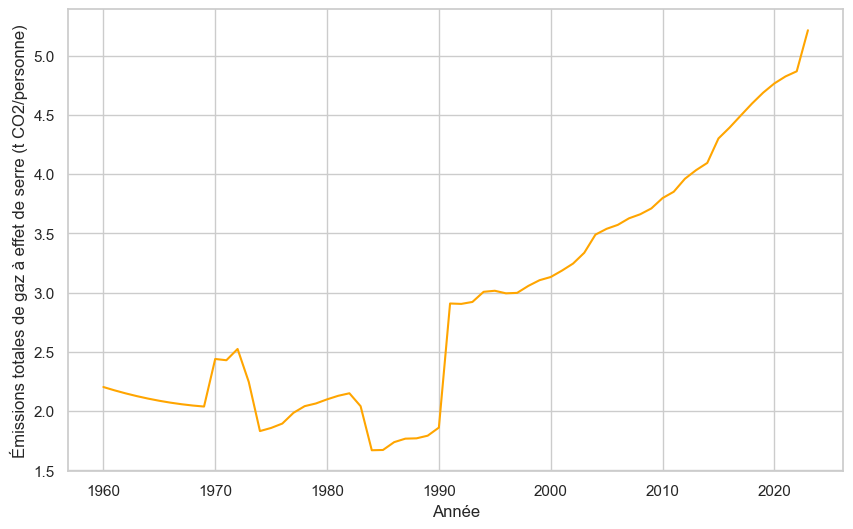

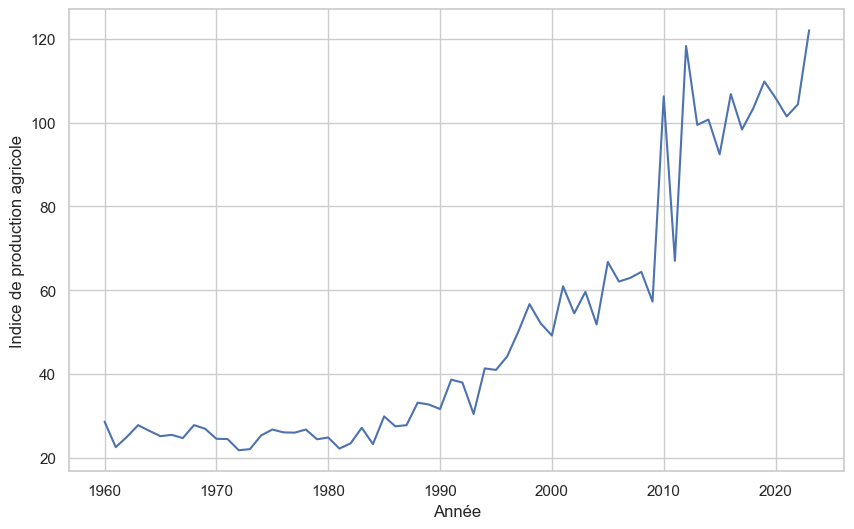

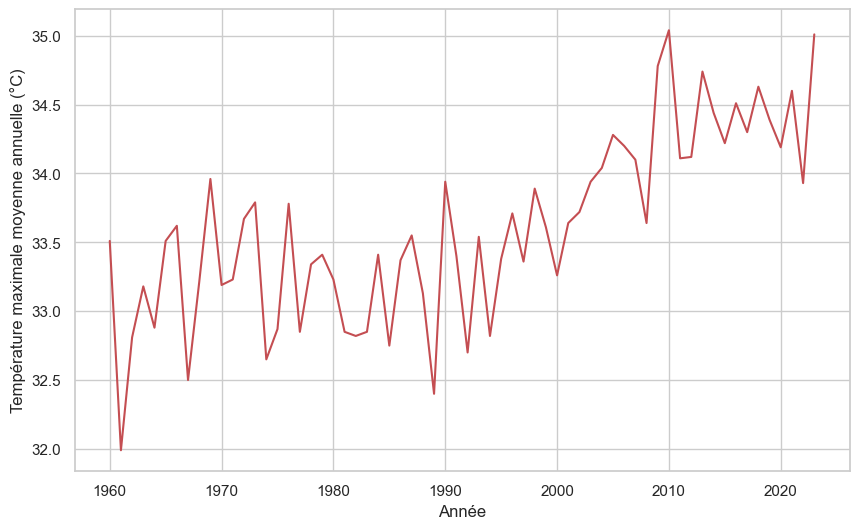

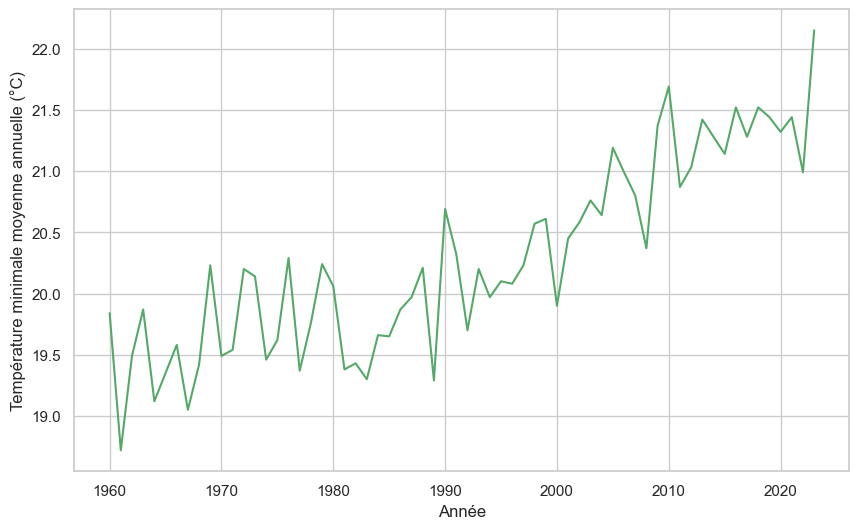

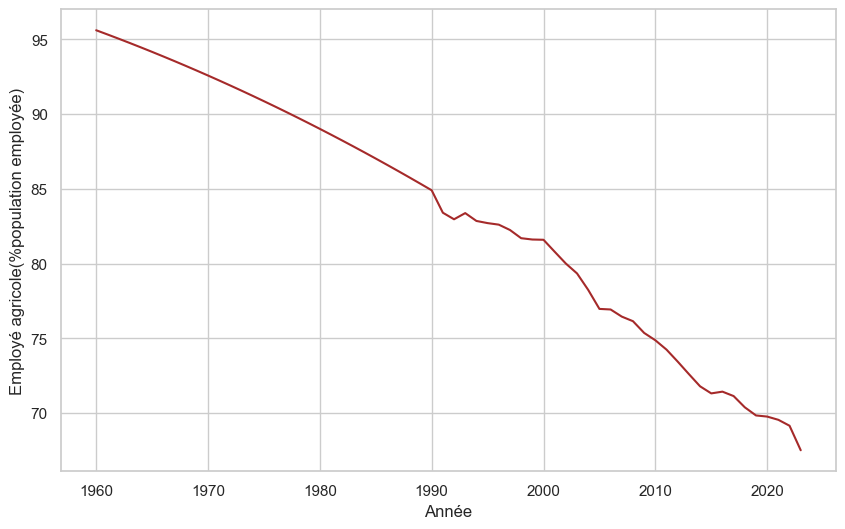

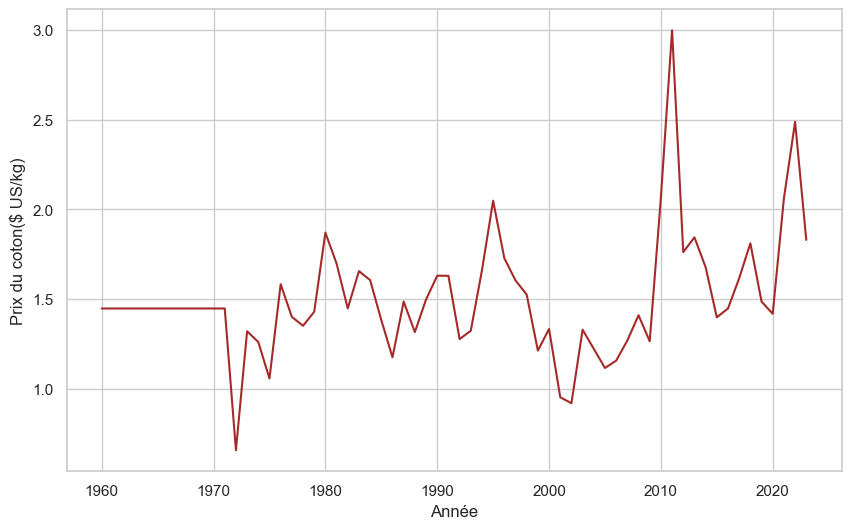

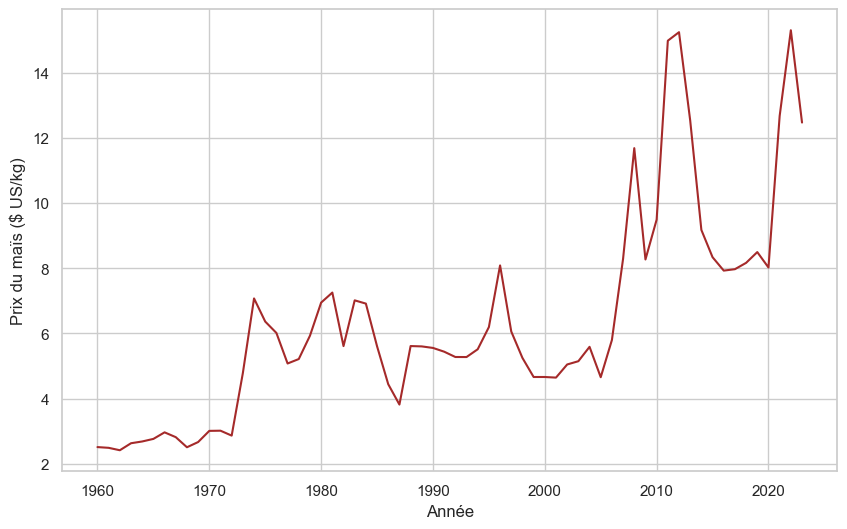

In [478]:
for var in variables:
    # Style pour les graphiques
    plt.style.use ('seaborn-v0_8-colorblind')#('seaborn-darkgrid')

    # 1. Indice pluviom√©trique
    plt.figure(figsize=(10, 6))
    plt.plot(df['Year'], df[var], label=f'{variable_meanings[var]}', color=f'{variable_color[var]}')
    #plt.plot(df['Year'], df['indice_prod_ag'], label='Indice de production agricole', color='brown')
    #plt.title('√âvolution de l\'indice pluviom√©trique')
    plt.xlabel('Ann√©e')
    plt.ylabel(f'{variable_meanings[var]}')
    #plt.legend()
    plt.show()

In [509]:
variable_meanings


{'aqua_culti_land': 'Surface totale des terres agricoles cultiv√©es (%)',
 'aqua_pluvio': 'Indice pluviom√©trique annuel',
 'gaz_effet_serre': '√âmissions totales de gaz √† effet de serre (t CO2/personne)',
 'indice_prod_ag': 'Indice de production agricole',
 'tasmax_annuel': 'Temp√©rature maximale moyenne annuelle (¬∞C)',
 'tasmin_annuel': 'Temp√©rature minimale moyenne annuelle (¬∞C)',
 'emploi_ag': 'Employ√© agricole(%population employ√©e)',
 'Prix_cotton (USD/kg)': 'Prix du coton($ US/kg)',
 'Prix_corn (USD/kg)': 'Prix du ma√Øs ($ US/kg)'}

C:\Users\Hp\AppData\Local\Temp\ipykernel_28600\547677960.py:49: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustement des marges
c:\Users\Hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


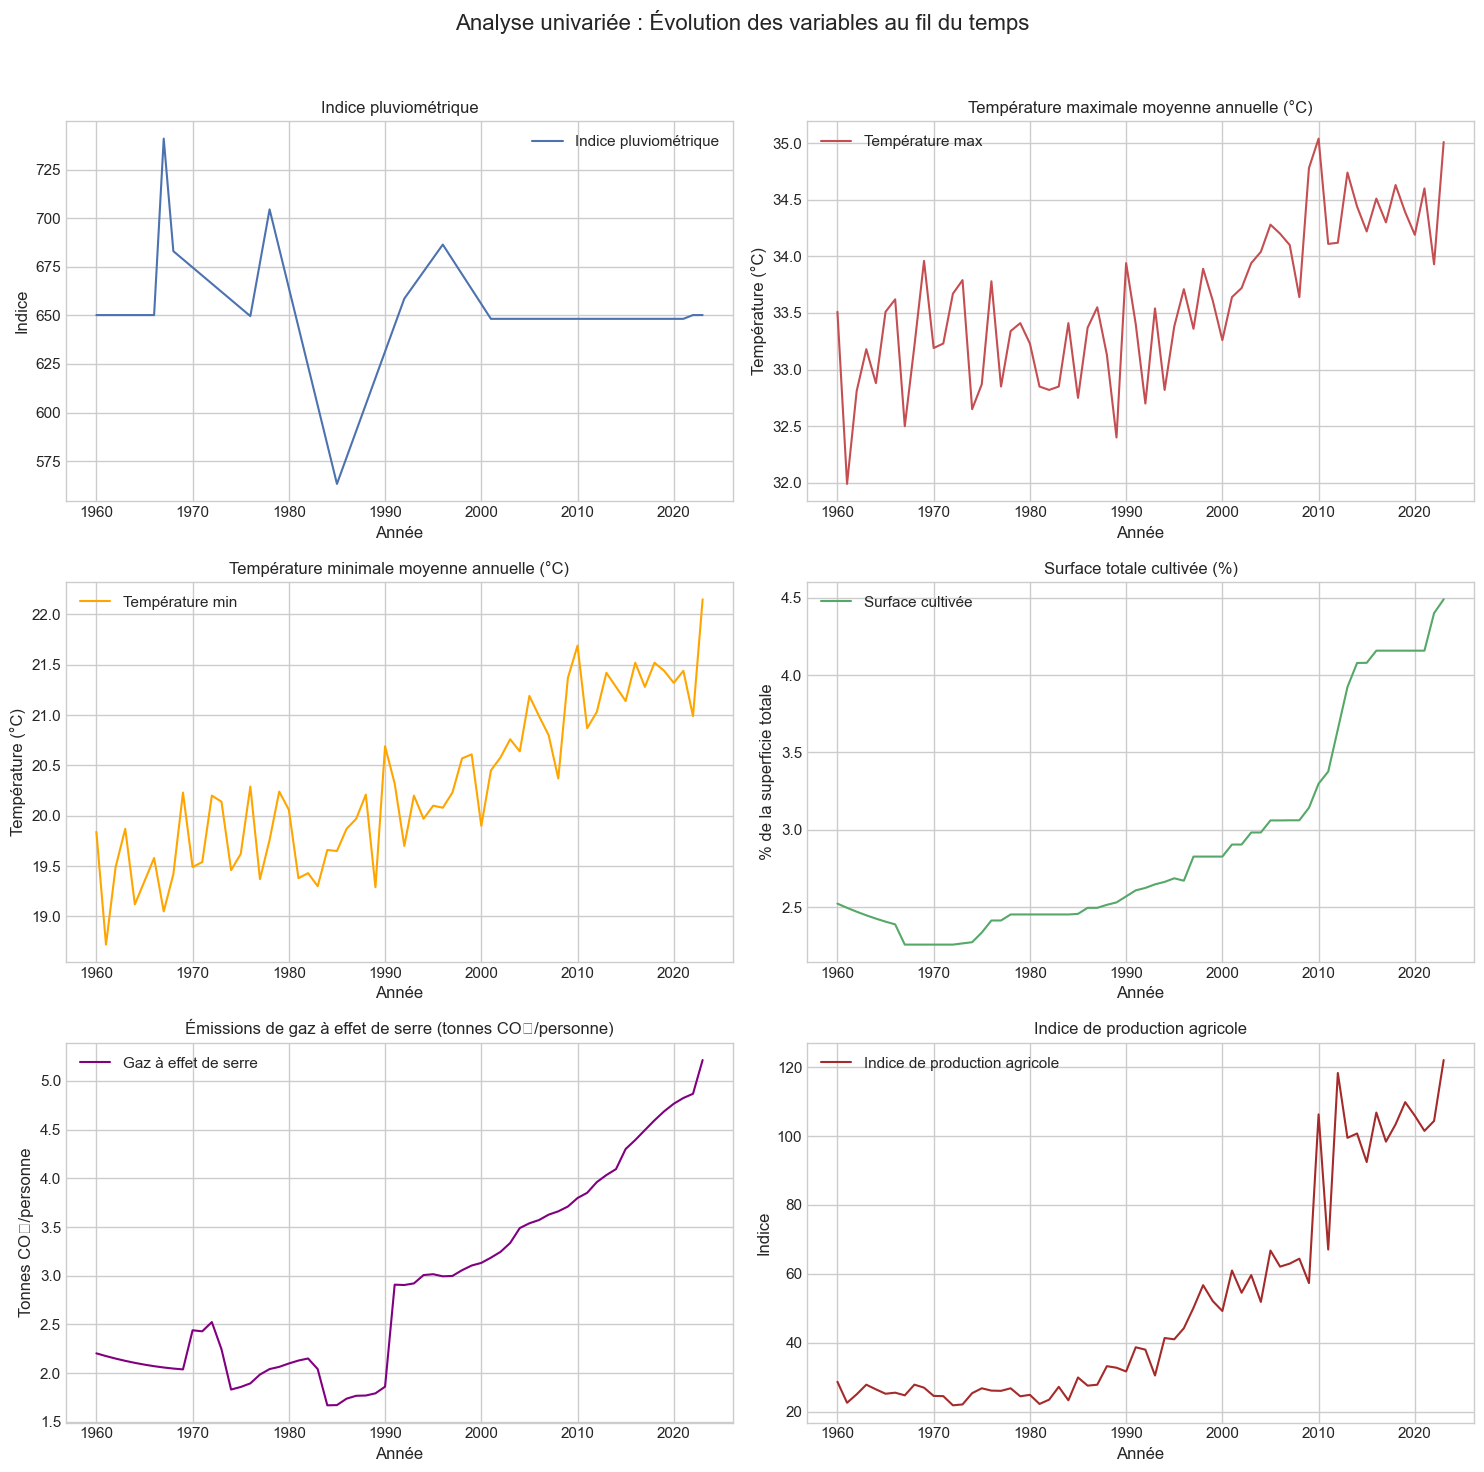

In [480]:

df=base_finale_mes
# Configuration des graphiques
plt.style.use('seaborn-v0_8-whitegrid')  # Style pour les graphiques
fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # Configuration de la grille
fig.suptitle("Analyse univari√©e : √âvolution des variables au fil du temps", fontsize=16)

# 1. √âvolution de l'indice pluviom√©trique
axes[0, 0].plot(df['Year'], df['aqua_pluvio'], label='Indice pluviom√©trique', color='b')
axes[0, 0].set_title('Indice pluviom√©trique')
axes[0, 0].set_xlabel('Ann√©e')
axes[0, 0].set_ylabel('Indice')
axes[0, 0].legend()

# 2. √âvolution de la temp√©rature maximale
axes[0, 1].plot(df['Year'], df['tasmax_annuel'], label='Temp√©rature max', color='r')
axes[0, 1].set_title('Temp√©rature maximale moyenne annuelle (¬∞C)')
axes[0, 1].set_xlabel('Ann√©e')
axes[0, 1].set_ylabel('Temp√©rature (¬∞C)')
axes[0, 1].legend()

# 3. √âvolution de la temp√©rature minimale
axes[1, 0].plot(df['Year'], df['tasmin_annuel'], label='Temp√©rature min', color='orange')
axes[1, 0].set_title('Temp√©rature minimale moyenne annuelle (¬∞C)')
axes[1, 0].set_xlabel('Ann√©e')
axes[1, 0].set_ylabel('Temp√©rature (¬∞C)')
axes[1, 0].legend()

# 4. √âvolution de la surface cultiv√©e
axes[1, 1].plot(df['Year'], df['aqua_culti_land'], label='Surface cultiv√©e', color='g')
axes[1, 1].set_title('Surface totale cultiv√©e (%)')
axes[1, 1].set_xlabel('Ann√©e')
axes[1, 1].set_ylabel('% de la superficie totale')
axes[1, 1].legend()

# 5. √âvolution des √©missions de gaz √† effet de serre
axes[2, 0].plot(df['Year'], df['gaz_effet_serre'], label='Gaz √† effet de serre', color='purple')
axes[2, 0].set_title('√âmissions de gaz √† effet de serre (tonnes CO‚ÇÇ/personne)')
axes[2, 0].set_xlabel('Ann√©e')
axes[2, 0].set_ylabel('Tonnes CO‚ÇÇ/personne')
axes[2, 0].legend()

# 6. √âvolution de l'indice de production agricole
axes[2, 1].plot(df['Year'], df['indice_prod_ag'], label='Indice de production agricole', color='brown')
axes[2, 1].set_title('Indice de production agricole')
axes[2, 1].set_xlabel('Ann√©e')
axes[2, 1].set_ylabel('Indice')
axes[2, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustement des marges
plt.show()


In [482]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


c:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


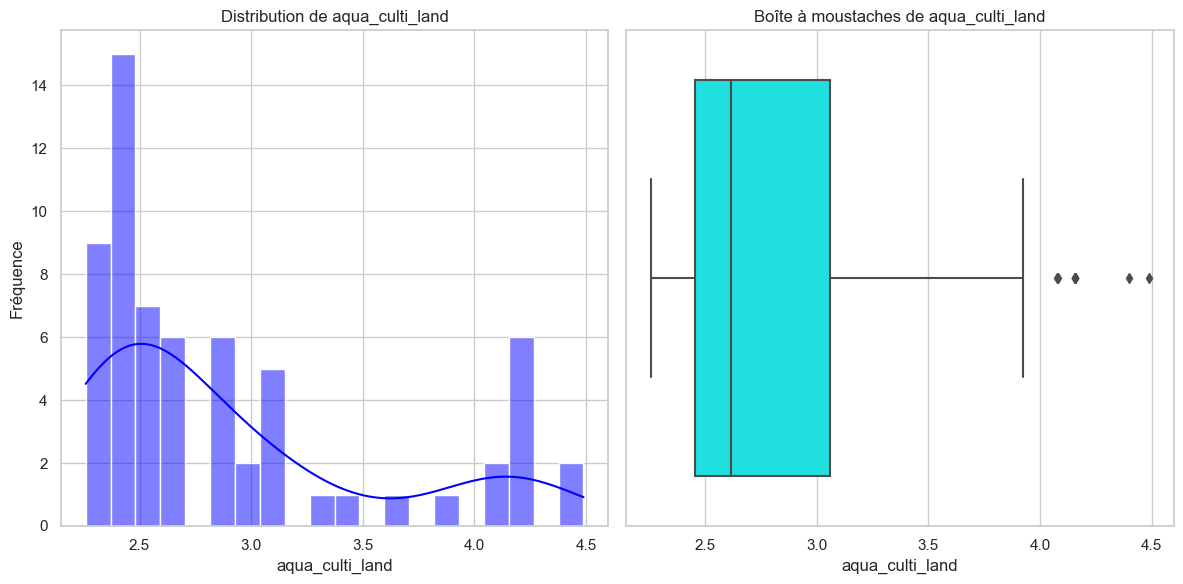

c:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


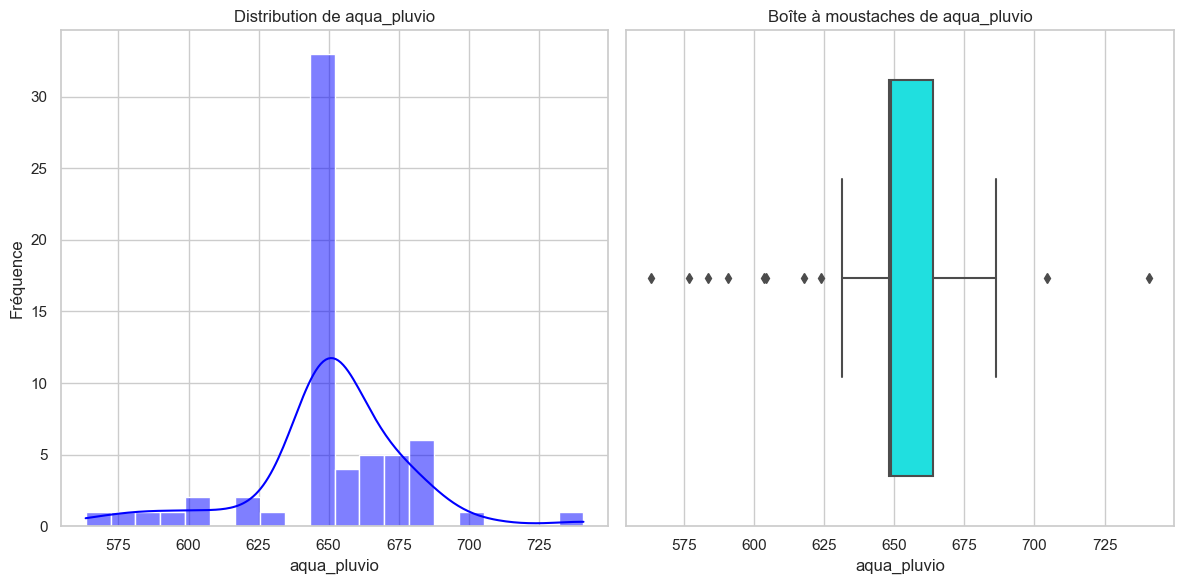

c:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


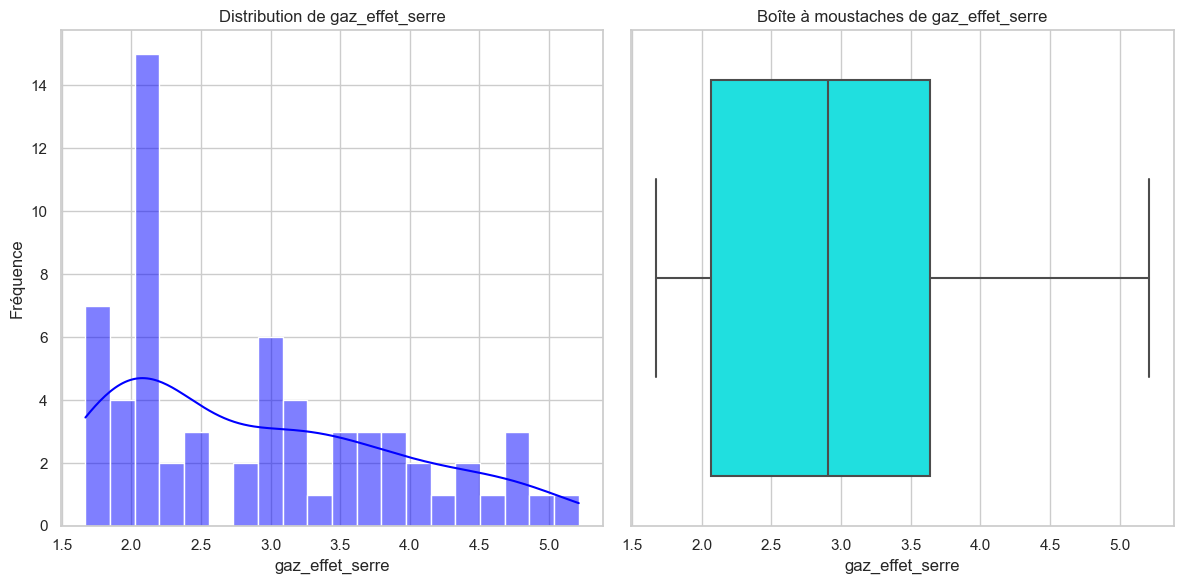

c:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


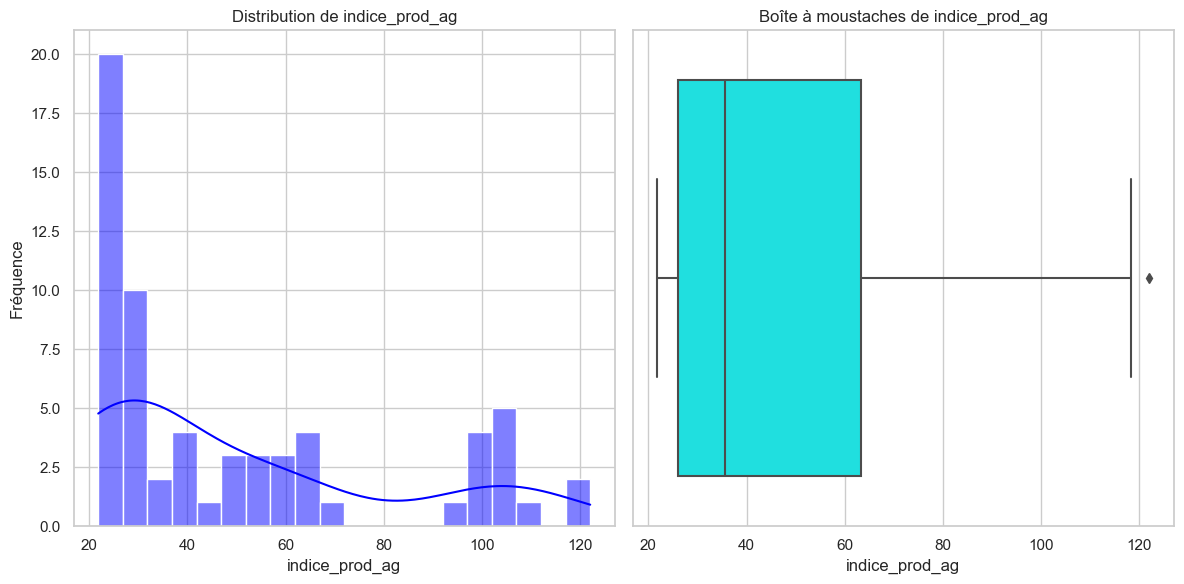

c:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


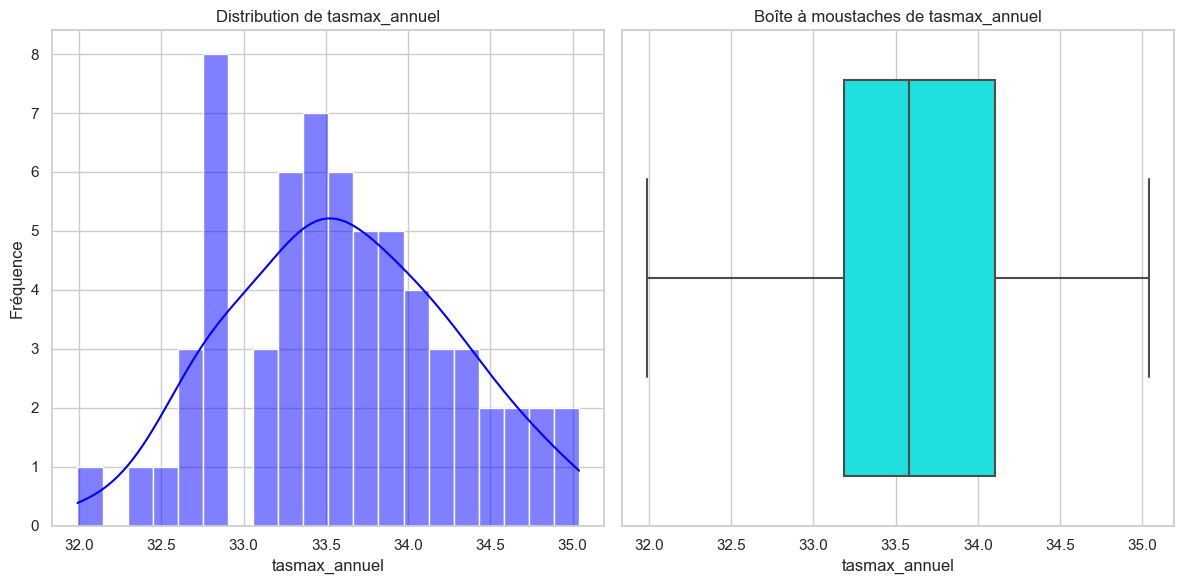

c:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


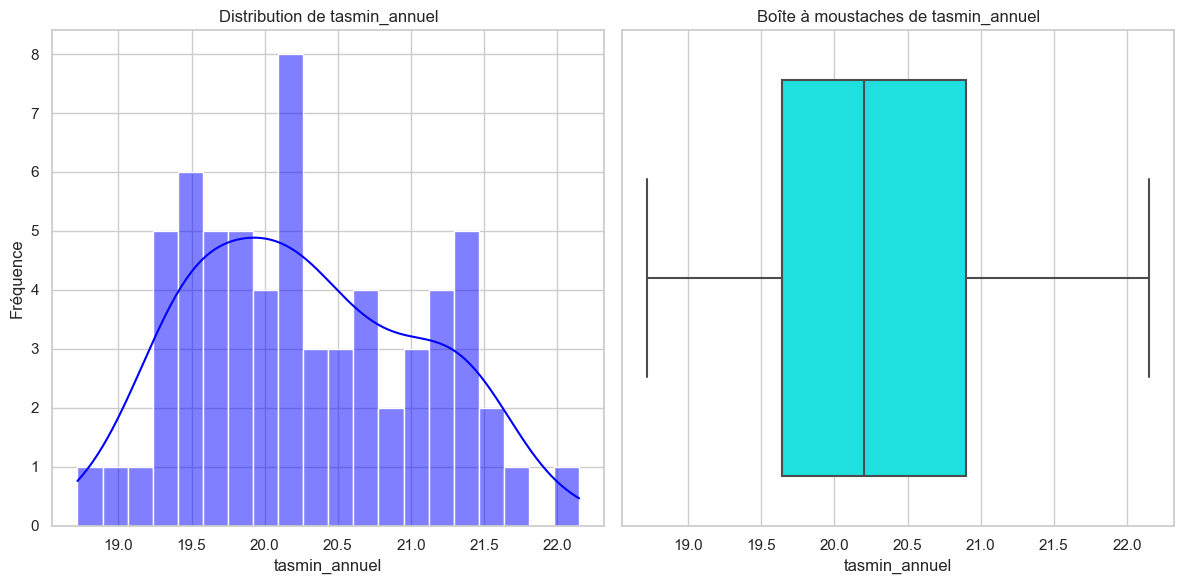

c:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


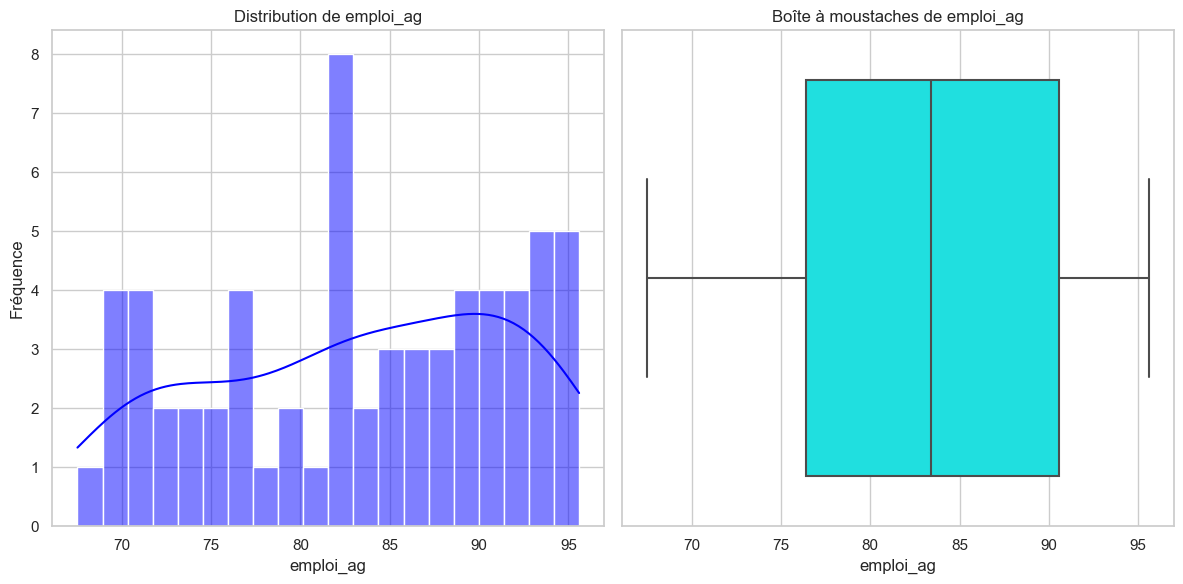

c:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


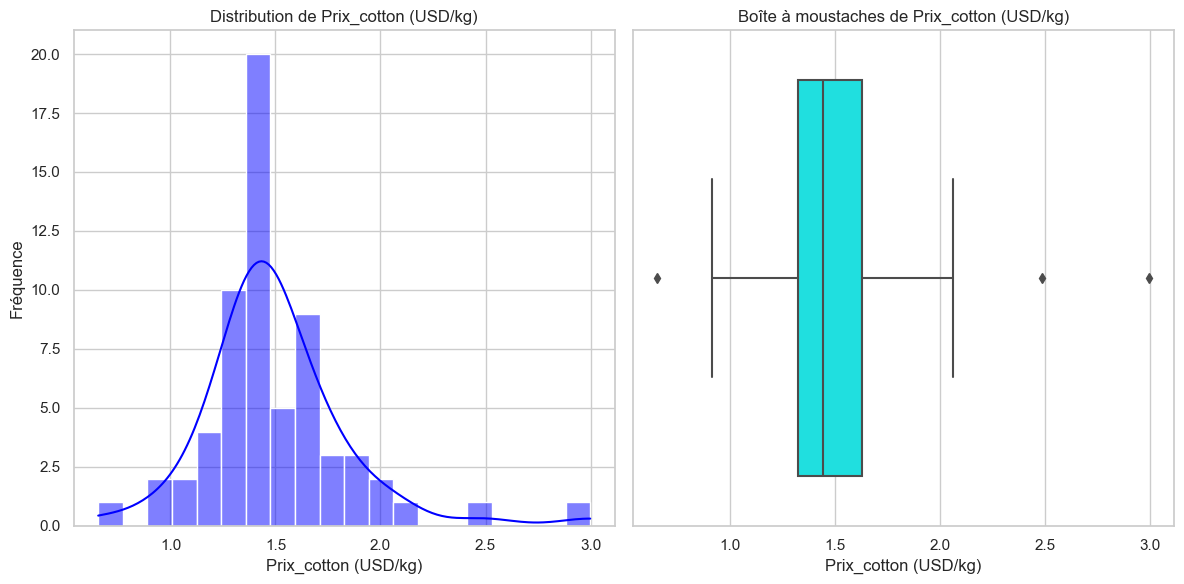

c:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


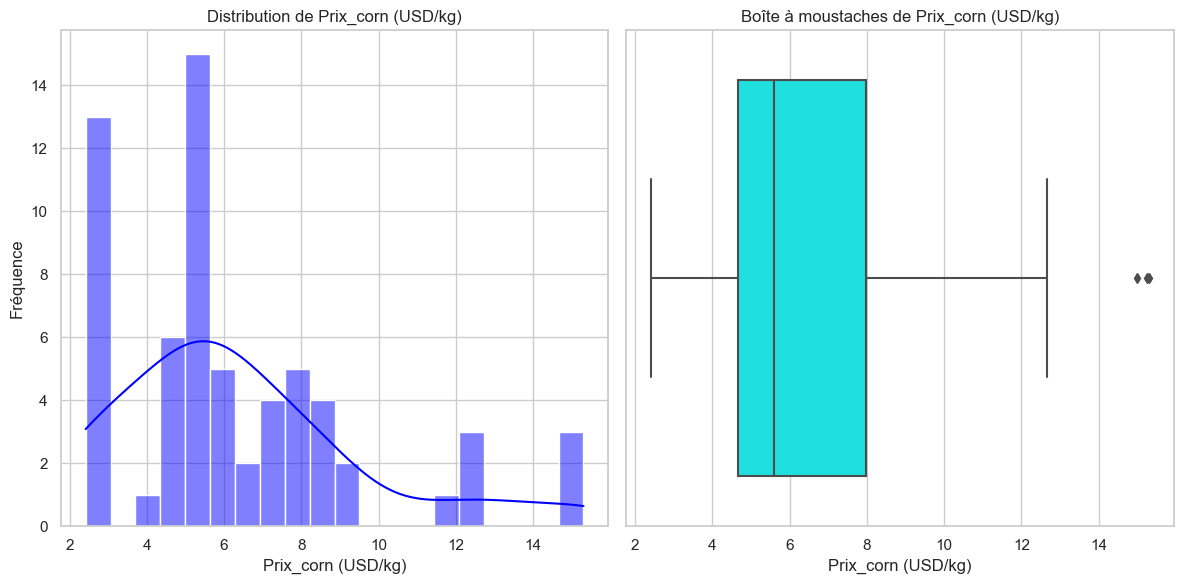

In [484]:
data = base_finale_mes.copy()


# Cr√©ation de visualisations
for column in variables:
    if data[column].dtype in ['int64', 'float64']:  # Variables num√©riques
        plt.figure(figsize=(12, 6))
        
        # Histogramme
        plt.subplot(1, 2, 1)
        sns.histplot(data[column], kde=True, bins=20, color='blue')
        plt.title(f"Distribution de {column}")
        plt.xlabel(column)
        plt.ylabel("Fr√©quence")
        
        # Bo√Æte √† moustaches 
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[column], color='cyan')
        plt.title(f"Bo√Æte √† moustaches de {column}")
        plt.xlabel(column)
        
        plt.tight_layout()
        plt.show()

    else:  # Variables cat√©goriques
        plt.figure(figsize=(8, 4))
        sns.countplot(y=data[column], palette="viridis")
        plt.title(f"R√©partition des cat√©gories de {column}")
        plt.xlabel("Fr√©quence")
        plt.ylabel(column)
        plt.show()


## bivari√©e

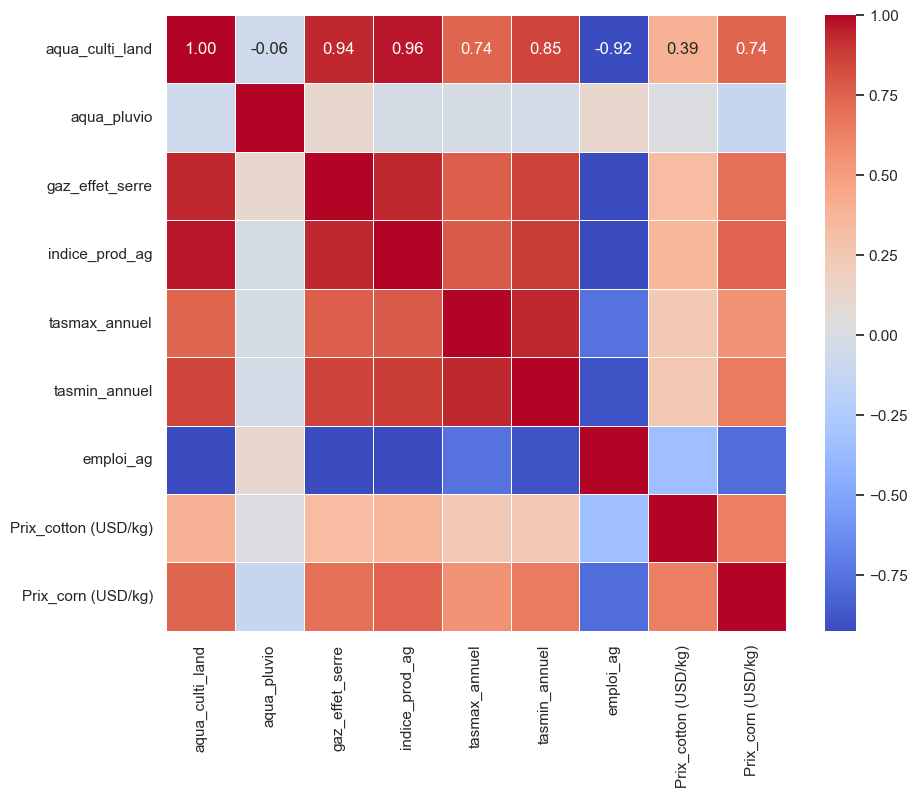

'\n# Diagrammes de dispersion pour chaque paire de variables num√©riques\nnum_cols = data.select_dtypes(include=[\'float64\', \'int64\']).columns\nfor i in range(len(num_cols)):\n    for j in range(i+1, len(num_cols)):\n        plt.figure(figsize=(8, 6))\n        sns.scatterplot(x=data[num_cols[i]], y=data[num_cols[j]], alpha=0.7)\n        plt.title(f"Relation entre {num_cols[i]} et {num_cols[j]}")\n        plt.xlabel(num_cols[i])\n        plt.ylabel(num_cols[j])\n        plt.show()'

In [494]:
data=base_finale_mes.copy()
# Relations entre variables num√©riques : Matrice de corr√©lation
plt.figure(figsize=(10, 8))
correlation_matrix = data[variables].corr()  # Calculer la matrice de corr√©lation
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
#plt.title("Matrice de corr√©lation")
plt.show()
"""
# Diagrammes de dispersion pour chaque paire de variables num√©riques
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=data[num_cols[i]], y=data[num_cols[j]], alpha=0.7)
        plt.title(f"Relation entre {num_cols[i]} et {num_cols[j]}")
        plt.xlabel(num_cols[i])
        plt.ylabel(num_cols[j])
        plt.show()"""

Variable ind√©pendante  Corr√©lation      P-valeur
0       aqua_culti_land     0.964316  1.719917e-37
1           aqua_pluvio    -0.020929  8.696152e-01
2       gaz_effet_serre     0.938331  2.711168e-30
3         tasmax_annuel     0.781284  2.606097e-14
4         tasmin_annuel     0.878759  1.384491e-21

Corr√©lations avec la variable d√©pendante :
  Variable ind√©pendante  Corr√©lation      P-valeur
0       aqua_culti_land     0.964316  1.719917e-37
1           aqua_pluvio    -0.020929  8.696152e-01
2       gaz_effet_serre     0.938331  2.711168e-30
3         tasmax_annuel     0.781284  2.606097e-14
4         tasmin_annuel     0.878759  1.384491e-21
5             emploi_ag    -0.925362  8.284732e-28
6  Prix_cotton (USD/kg)     0.360954  3.387473e-03
7    Prix_corn (USD/kg)     0.745358  1.616605e-12


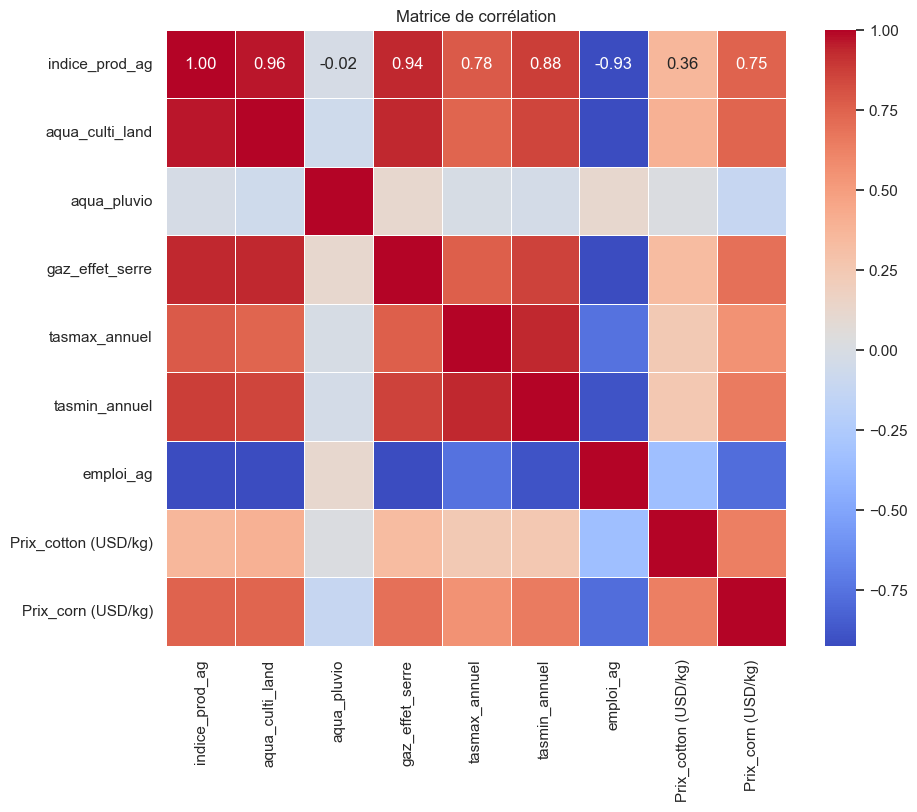

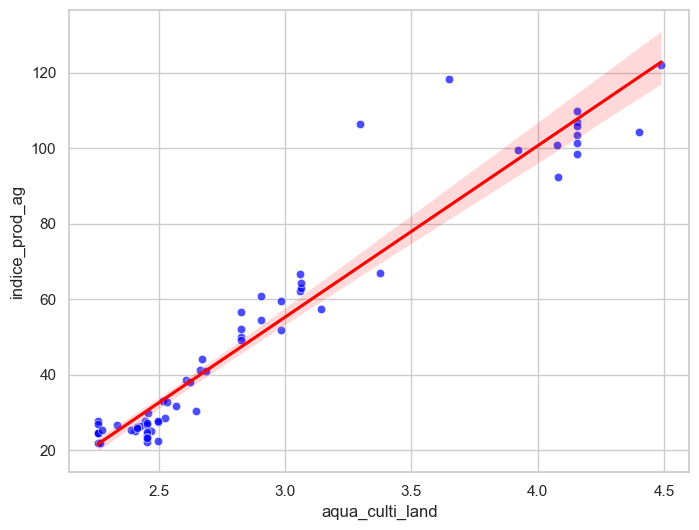

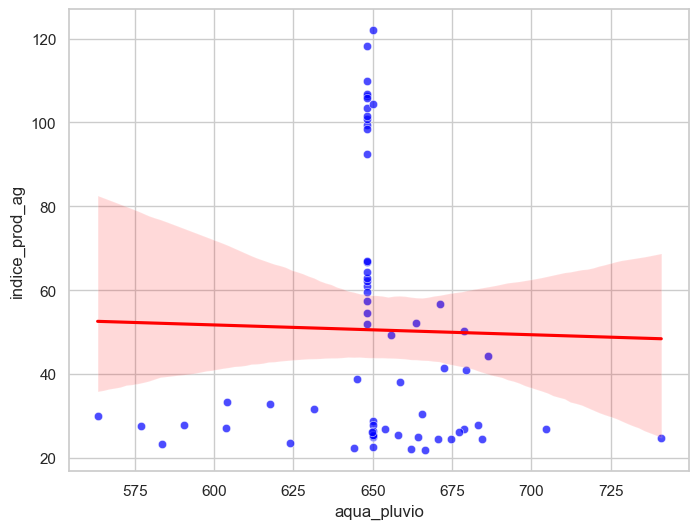

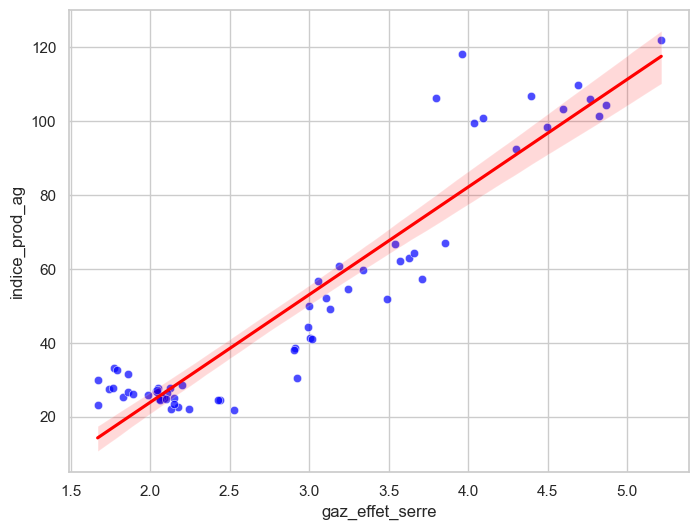

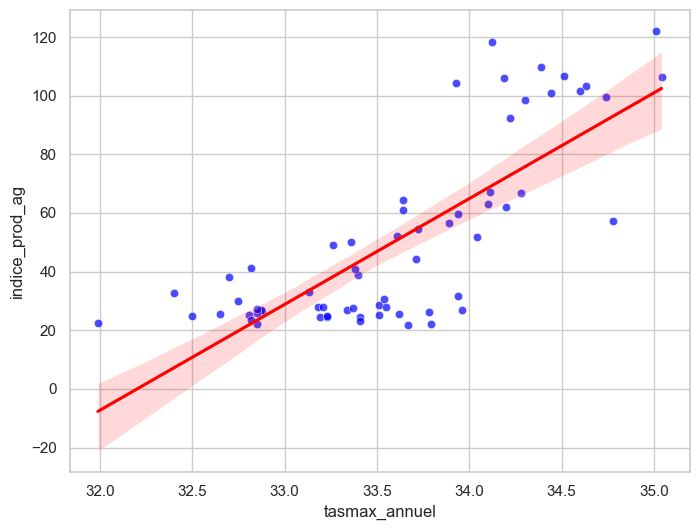

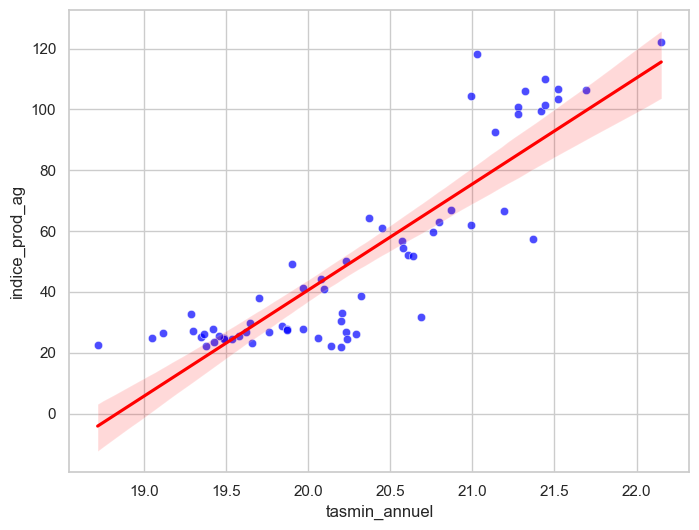

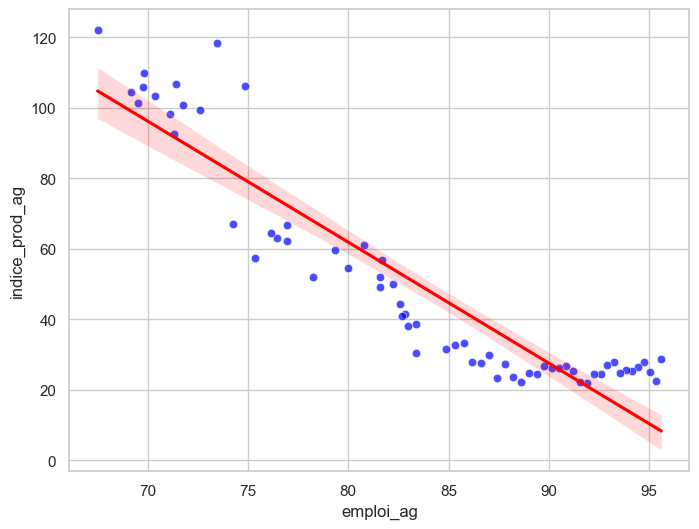

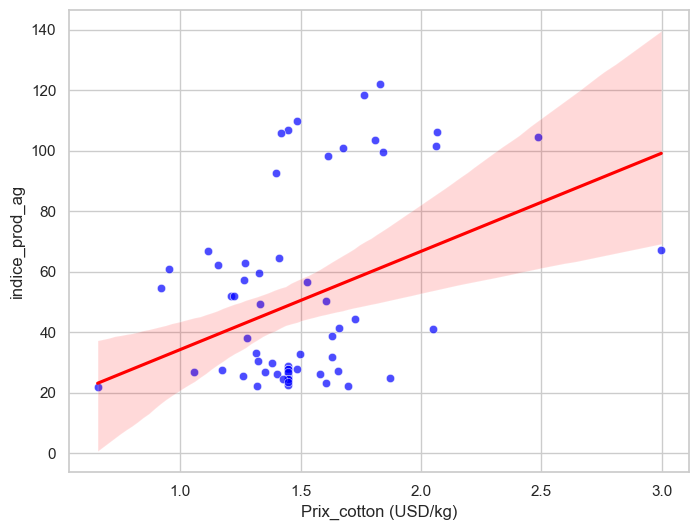

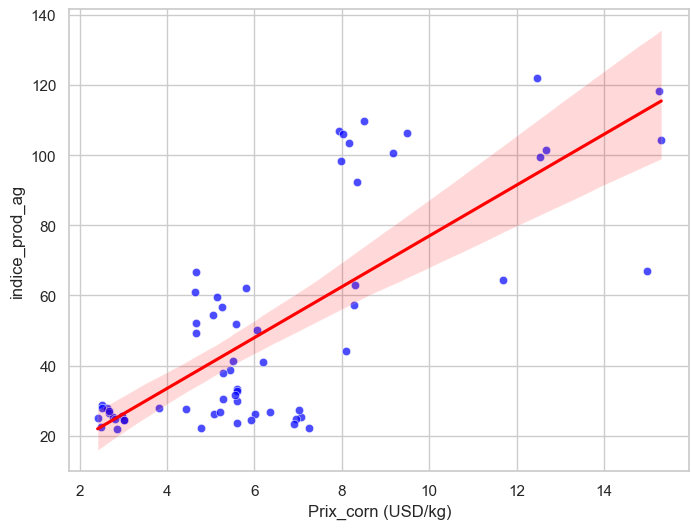

In [510]:
# Liste des variables ind√©pendantes
a=variables
independent_vars = a
dependent_var = "indice_prod_ag"
data=base_finale_mes.copy()
# Calcul des corr√©lations
print("Corr√©lations avec la variable d√©pendante :")
"""for var in independent_vars:
    corr, p_value = pearsonr(data[dependent_var], data[var])
    print(f"{var} : Corr√©lation = {corr:.2f}, p-valeur = {p_value:.4f}")"""
# Calcul des corr√©lations et stockage des r√©sultats
results = []
for var in independent_vars:
    corr, p_value = pearsonr(data[dependent_var], data[var])
    results.append({"Variable ind√©pendante": var, 
                    "Corr√©lation": corr, 
                    "P-valeur": p_value})
    #"Variable d√©pendante": dependent_var, si on veut une colonne supp
results_df = pd.DataFrame(results)
print(results_df)
"""‚à£r‚à£ proche de 1 indique une forte relation lin√©aire.
ùëü>0 indique une relation positive ; 
ùëü<0, une relation n√©gative.
Une p-valeur < 0.05 indique que la corr√©lation est statistiquement significative."""

# Matrice de corr√©lation (incluant uniquement les variables d'int√©r√™t)
plt.figure(figsize=(10, 8))
correlation_matrix = data[[dependent_var] + independent_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corr√©lation")
plt.show()

# Diagrammes de dispersion
for var in independent_vars:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[var], y=data[dependent_var], alpha=0.7, color='blue')
    sns.regplot(x=data[var], y=data[dependent_var], scatter=False, color='red',label=True)
   # plt.title(f"Relation entre {var} et {dependent_var}")
    plt.xlabel(var)
    plt.ylabel(dependent_var)
    plt.show()

In [512]:
variable_meanings

{'aqua_culti_land': 'Surface totale des terres agricoles cultiv√©es (%)',
 'aqua_pluvio': 'Indice pluviom√©trique annuel',
 'gaz_effet_serre': '√âmissions totales de gaz √† effet de serre (t CO2/personne)',
 'indice_prod_ag': 'Indice de production agricole',
 'tasmax_annuel': 'Temp√©rature maximale moyenne annuelle (¬∞C)',
 'tasmin_annuel': 'Temp√©rature minimale moyenne annuelle (¬∞C)',
 'emploi_ag': 'Employ√© agricole(%population employ√©e)',
 'Prix_cotton (USD/kg)': 'Prix du coton($ US/kg)',
 'Prix_corn (USD/kg)': 'Prix du ma√Øs ($ US/kg)'}

In [511]:
results_df

Variable ind√©pendante  Corr√©lation      P-valeur
0       aqua_culti_land     0.964316  1.719917e-37
1           aqua_pluvio    -0.020929  8.696152e-01
2       gaz_effet_serre     0.938331  2.711168e-30
3         tasmax_annuel     0.781284  2.606097e-14
4         tasmin_annuel     0.878759  1.384491e-21
5             emploi_ag    -0.925362  8.284732e-28
6  Prix_cotton (USD/kg)     0.360954  3.387473e-03
7    Prix_corn (USD/kg)     0.745358  1.616605e-12

<Figure size 1000x600 with 0 Axes>

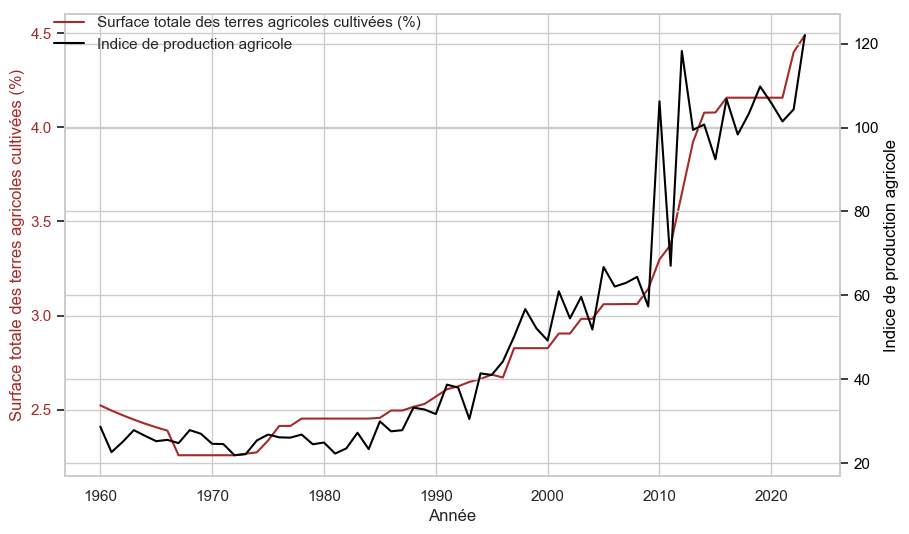

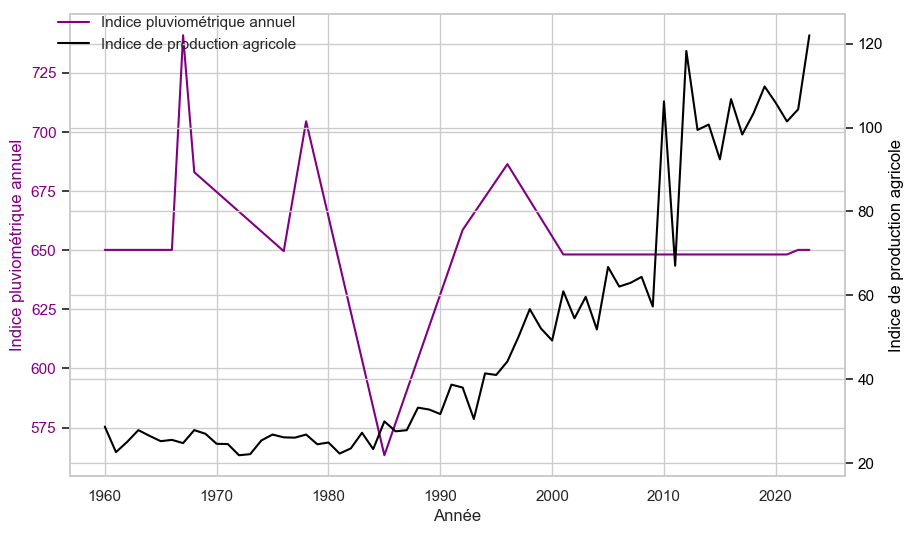

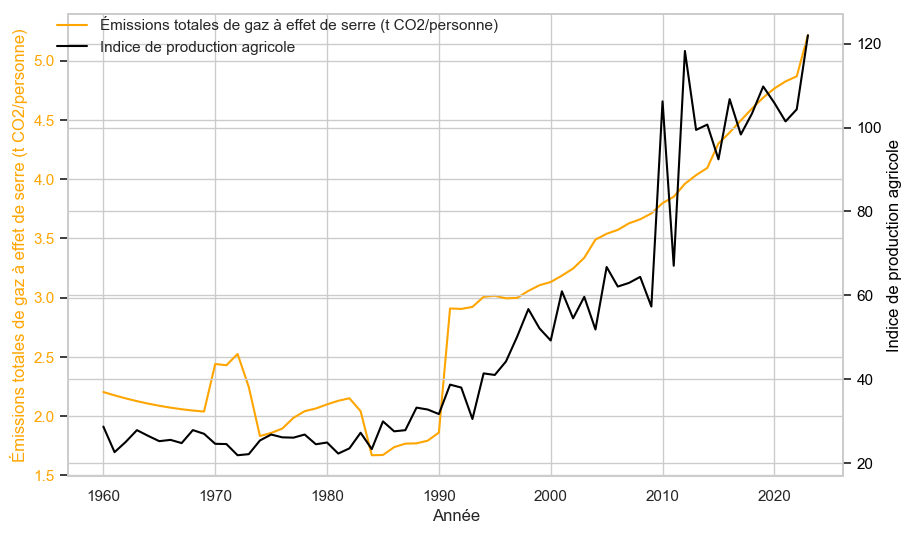

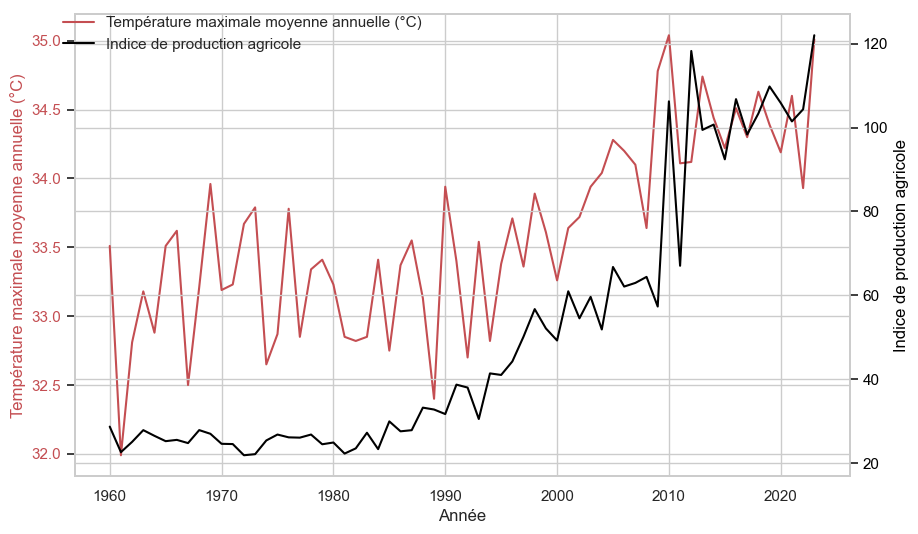

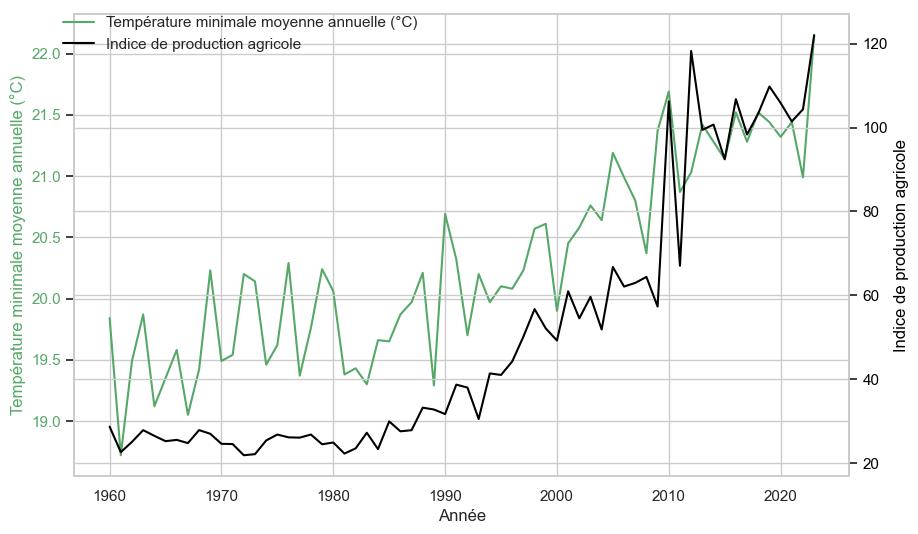

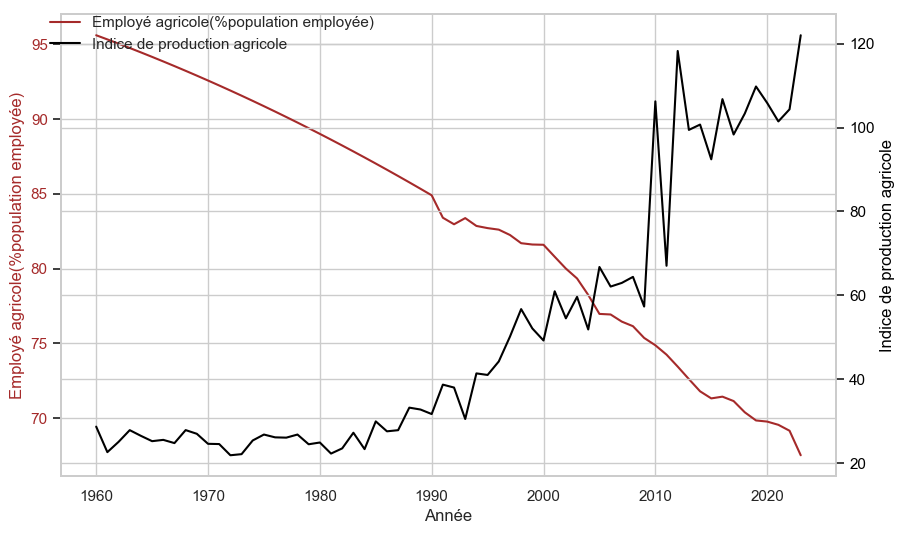

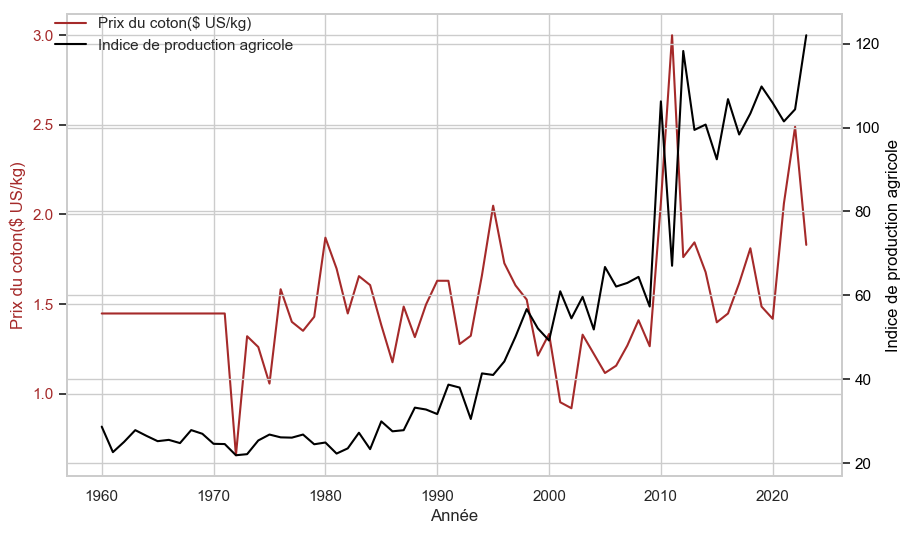

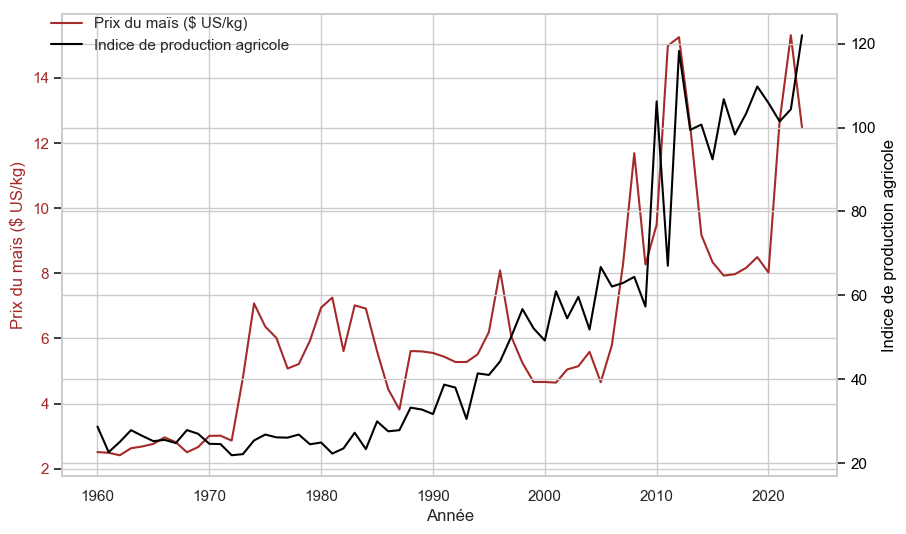

In [501]:
df=base_finale_mes

# Configuration de la figure
plt.figure(figsize=(10, 6))
for var in independent_vars:
    # Trac√© de la premi√®re variable (Indice pluviom√©trique) sur l'axe principal
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.plot(df['Year'], df[var], label=f'{variable_meanings[var]}', color=f'{variable_color[var]}')
    ax1.set_xlabel('Ann√©e')
    ax1.set_ylabel(f'{variable_meanings[var]}', color=f'{variable_color[var]}')
    ax1.tick_params(axis='y', labelcolor=f'{variable_color[var]}')

    # Cr√©ation d'un second axe pour l'indice de production agricole
    ax2 = ax1.twinx()
    ax2.plot(df['Year'], df['indice_prod_ag'], label='Indice de production agricole', color='black')
    ax2.set_ylabel('Indice de production agricole', color='black')
    ax2.tick_params(axis='y', labelcolor='black')

    # Ajouter une l√©gende combin√©e
    fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
    #plt.title('√âvolution de l\'indice pluviom√©trique et de l\'indice de production agricole')

# Affichage du graphique
plt.show()